In [2]:
from IPython.display import YouTubeVideo

# 1. Overview

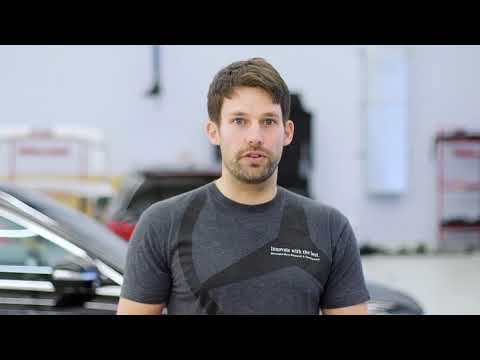

In [4]:
YouTubeVideo('rSj5lpzliQg', width=960, height=540)

## Markov Localization and the Kidnapped Vehicle Project

The localization module culminates in the Kidnapped Vehicle Project. In that project our vehicle has been kidnapped and placed in an unknown location. We must leverage our knowledge of localization to determine where our vehicle is. The Kidnapped Vehicle Project relies heavily on the particle filter approach to localization, particularly "Implementation of a Particle Filter," an upcoming lesson. This leaves the question; How does Markov Localization relate to the Kidnapped Vehicle project?

Markov Localization or Bayes Filter for Localization is a generalized filter for localization and all other localization approaches are realizations of this approach, as discussed here. By learning how to derive and implement (coding exercises) this filter we develop intuition and methods that will help us solve any vehicle localization task, including implementation of a particle filter. We don't know exactly where our vehicle is at any given time, but can approximate it's location. As such, we generally think of our vehicle location as a probability distribution, each time we move, our distribution becomes more diffuse (wider). We pass our variables (map data, observation data, and control data) into the filter to concentrate (narrow) this distribution, at each time step. Each state prior to applying the filter represents our prior and the narrowed distribution represents our Bayes' posterior.

## Bayes' Rule

If you'd like a reminder about how Bayes' rule works, watch Sebastian's Bayes' rule video from the Localization Overview lesson.

# 2. Localization Posterior: Introduction

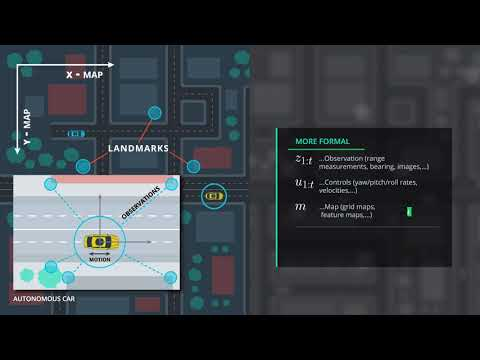

In [5]:
YouTubeVideo('WCva9DtGgGA', width=960, height=540)

## Formal Definition of Variables

$z_{1:t}$ represents the observation vector from time 0 to t (range measurements, bearing, images, etc.).

$u_{1:t}$ represents the control vector from time 0 to t (yaw/pitch/roll rates and velocities).

$m$ represents the map (grid maps, feature maps, landmarks)

$x_tx$ represents the pose (position (x,y) + orientation $\thetaθ$)

## Quiz
Given the map, the control elements of the car, and the observations, what is the definition of the posterior distribution for the state x at time t?

(A) $bel(x_t) = p(x_t|z_t, m, u_t)$

(B) $bel(x_t) = p(x_t| z_{1:t}, u_{1:t})$

(C) $bel(x_t) = p(x_t, m_t|z_{1:t}, u_{1:t})$

(D) $bel(x_t) = p(x_t|z_{1:t}, u_{1:t}, m)$

### QUIZ QUESTION
Given the map, the control elements of the car, and the observations, what is the definition of the posterior distribution for the state x at time t?

Answer: (D) The belief of $x_t$ is the posterior distribution of $x_t$ given all observations, the controls and the map.

# 3. Localization Posterior Explanation and Implementation

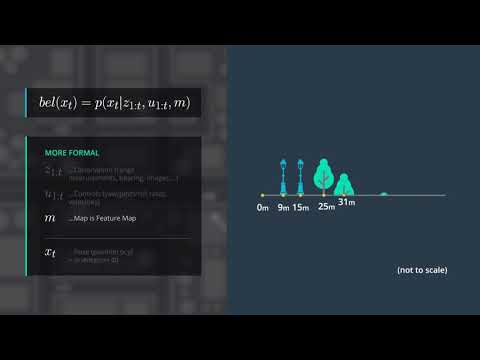

In [6]:
YouTubeVideo('lGpIgbA5ZdA', width=960, height=540)

# 4. Bayes' Rule

Before we dive into deeper into Markov localization, we should review Bayes' Rule. This will serve as a refresher for those familiar with Bayesian methods and we provide some additional resources for those less familiar.

Recall that Bayes' Rule enables us to determine the conditional probability of a state given evidence P(a|b) by relating it to the conditional probability of the evidence given the state (P(b|a) in the form of:

$P(a)*P(b|a) = P(b)*P(a|b)P(a)∗P(b∣a)=P(b)∗P(a∣b)$

which can be rearranged to:

$P(a|b) = \frac{P(b|a) \, P(a)}{P(b)}$ 

In other words the probability of state a, given evidence b, is the probability of evidence b, given state a, multiplied by the probability of state a, normalized by the total probability of b over all states.

Let's move on to an example to illustrate the utility of Bayes' Rule.

## Bayes' Rule Applied

Let's say we have two bags of marbles, bag 1 and bag 2, filled with two types of marbles, red and blue. Bag 1 contains 10 blue marbles and 30 red marbles, whereas bag 2 contains 20 of each color marble.

If a friend were to choose a bag at random and then a marble at random, from that bag, how can we determine the probability that that marble came from a specific bag? If you guessed Bayes' Rule, you are definitely paying attention.

In this scenario, our friend produces a red marble, in that case, what is the probability that the marble came from bag 1? Rewriting this in terms of Bayes' Rule, our solution becomes:

$P(Bag1 | Red) = \frac{P(Red | Bag1), P(Bag1)}{P(Red)}$.

Let's walk through the process in the following quizzes.

## QUESTION 1 OF 4
What is the prior probability of choosing bag 1? This is the term P(Bag1) .

Answer: 0.5

## QUESTION 2 OF 4
What is the probability of choosing a red marble from bag 1? This is our likelihood term P(Red|Bag1).

Answer: 0.75

## QUESTION 3 OF 4
What is the total probability of choosing a red marble? This is our normalization term (denominator) P(Red) .

Answer: 0.625

## QUESTION 4 OF 4
Now, putting everything together, using the formula for Bayes' Rule, what is our posterior probability of the red marble originating from bag 1? This is our posterior term P(Bag1|Red) ?

Answer: 0.6

# Bayesian Methods Resources
- [Sebastian Discusses Bayes Rule](https://classroom.udacity.com/nanodegrees/nd013/parts/40f38239-66b6-46ec-ae68-03afd8a601c8/modules/2c318113-724b-4f9f-860c-cb334e6e4ad7/lessons/48739381/concepts/487221690923)
- [More Bayes Rule Content from Udacity](https://classroom.udacity.com/courses/st101/lessons/48703346/concepts/483698470923)
- [Bayes Rule with Ratios](https://betterexplained.com/articles/understanding-bayes-theorem-with-ratios)
- [A Deep Dive into Bayesian Methods, for Programmers](http://greenteapress.com/wp/think-bayes/)

# 5. Bayes' Filter For Localization

We can apply Bayes' Rule to vehicle localization by passing variables through Bayes' Rule for each time step, as our vehicle moves. This is known as a **Bayes' Filter for Localization**. We will cover the specific as the lesson continues, but the generalized form Bayes' Filter for Localization is shown below. You may recognize this as being similar to a Kalman filter. In fact, many localization filters, including the Kalman filter are special cases of Bayes' Filter.

Remember the general form for Bayes' Rule:

$P(a|b) = \frac{P(b|a) \, P(a)}{P(b)}$
.

With respect to localization, these terms are:

1. $P(location|observation)$: This is P(a|b), the **normalized** probability of a position given an observation (posterior).
2. $P(observation|location)$: This is P(b|a), the probability of an observation given a position (likelihood)
3. $P(location)$: This is P(a), the prior probability of a position
4. $P(observation)$: This is P(b), the total probability of an observation

Without going into detail yet, be aware that $P(location)$ is determined by the motion model. The probability returned by the motion model is the product of the transition model probability (the probability of moving from $x_{t-1}x$ --> $x_t$ and the probability of the state $x_{t-1}$.

Over the course of this lesson, you’ll build your own Bayes’ filter. In the next few quizzes, you’ll write code to:

1. Compute Bayes’ rule
2. Calculate Bayes' posterior for localization
3. Initialize a prior belief state
4. Create a function to initialize a prior belief state given landmarks and assumptions

# 6. Calculate Localization Posterior

To continue developing our intuition for this filter and prepare for later coding exercises, let's walk through calculations for determining posterior probabilities at several pseudo positions x, for a single time step. We will start with a time step after the filter has already been initialized and run a few times. We will cover initialization of the filter in an upcoming concept.

| pseudo_position (x) |	P(location)	| P(observation∣location) |	Raw P(location∣observation) |	Normalized P(location∣observation) |
|:------------:|:------------:|:------------:|:-------------:|:------------:|
|1 |	1.67E-02 |	0.00E+00 |	0.00E+00 |	0.00E+00 |
|2 |	3.86E-02 |	6.99E-03 |	? |	2.59E-02 |
|3 |	4.90E-02 |	8.52E-02 |	4.18E-03 |	4.01E-01 |
|4 |	3.86E-02 |	? |	5.42E-03 |	5.21E-01 |
|5 |	1.69E-02 |	3.13E-02 |	5.31E-04 |	5.10E-02 |
|6 |	6.51E-03 |	9.46E-04 |	6.16E-06 |	? |
|7 |	? |	3.87E-06 |	6.55E-08 |	6.29E-06 |
|8 |	3.86E-02 |	0.00E+00 |	0.00E+00 |	0.00E+00 |

**Normalized P(location_observation) vs. Raw P(location|observation)**: The **Raw P(location|observation)** is the result prior to dividing by the total probability of P(observation), the P(b) term (denominator) of the generalized Bayes' rule. The normalized **P(location|observation)** is the result of after dividing by P(observation).

Remember the general form for Bayes' Rule:

$P(a|b) = \frac{P(b|a), P(a)}{P(b)}$


With respect to localization, these terms are:

1. P(location|observation): This is P(a|b), the normalized probability of a position given an observation (posterior)
2. P(observation|location): This is P(b|a), the probability of an observation given a position (likelihood)
3. P(location): This is P(a), the prior probability of a position
4. P(observation) : This is P(b), the total probability of an observation

### P(observation∣location)
What is P(observation∣location) for x = 4? Write the answer in scientific notation with an accuracy of two decimal places, for example 3.14E-15

Answer: To determine the observation probability divide the P(posterior) by P(position):
5.42E-3/3.86E-2 = 1.40E-1


### P(Posterior)
What is the raw posterior probability (P(location) for x = 2? Be sure to put the answer in scientific notation with an accuracy of two decimal places, for example 3.14E-15.

Answer: To determine the raw posterior probability multiply the P(position) by P(observation):
6.99E-3 * 3.86E-2 = 2.70E-4


### Normalized Posterior Probability
What is the normalized posterior probability for x = 6? Write the answer in scientific notation with an accuracy of two decimal places, for example 3.14E-15.

Answer: To determine the normalized posterior probability, first sum the raw P(Posterior) to get the total:
0.00E+00 + 2.70E-04 + 4.18E-03 + 5.42E-03 + 5.31E-04 + 6.16E-06 + 6.55E-08 + 0.00E+00 = 1.04E-02

Next, divide the P(Posterior) by the sum:

6.16E-06/1.04E-02 = 5.92E-4


### P(Position)
What is the position probability for x = 7? Write your answer in scientific notation with an accuracy of two decimal places, for example 3.14E-15

Answer: To determine the position probability divide P(posterior) by P(observation):
3.87E-06 * 6.55E-08 = 1.69E-2


# 7. Initialize Belief State

To help develop an intuition for this filter and prepare for later coding exercises, let's walk through the process of initializing our prior belief state. That is, what values should our initial belief state take for each possible position? Let's say we have a 1D map extending from 0 to 25 meters. We have landmarks at x = 5.0, 10.0, and 20.0 meters, with position standard deviation of 1.0 meter. If we know that our car's initial position is at one of these three landmarks, how should we define our initial belief state?

Since we know that we are parked next to a landmark, we can set our probability of being next to a landmark as 1.0. Accounting for a positon precision of +/- 1.0 meters, this places our car at an initial position in the range 4 - 6 (5 +/- 1), 9 - 11 (10 +/- 1), or 19 - 21 (20 +/- 1). All other positions, not within 1.0 meter of a landmark, are initialized to 0. We normalize these values to a total probability of 1.0 by dividing by the total number of positions that are potentially occupied. In this case, that is 9 positions, 3 for each landmark (the landmark position and one position on either side). This gives us a value of 1.11E-01 for positions +/- 1 from our landmarks (1.0/9). So, our initial belief state is:

{0, 0, 0, 1.11E-01, 1.11E-01, 1.11E-01, 0, 0, 1.11E-01, 1.11E-01, 1.11E-01, 0, 0, 0, 0, 0, 0, 0, 1.11E-01, 1.11E-01, 1.11E-01, 0, 0, 0, 0}

To reinforce this concept, let's practice with a quiz.

- map size: 100 meters
- landmark positions: {8, 15, 30, 70, 80}
- position standard deviation: 2 meters

Assuming we are parked next to a landmark, answer the following questions about our initial belief state.

### Initial Probability for Position 11
What is our initial probability (initial belief state) for position 11? If the answer is non-zero, enter it in scientific notation with an accuracy of two decimal places, for example 3.14E-15.

Answer:
To determine the initial probability we will divide 1.0 by the total number of positions within 2 meters of a landmark. In this case we have 5 landmarks and a position standard deviation of 2.0 meters. This gives us 5 potentially occupied positions per landmark (the landmark position and 2 each side), yielding 25 potentially occupied positions (5 landmarks * 5 positions/landmark).
1.0/25 = 4.0E-02


### Initial Probability for Position 71
What is our initial probability (initial belief state) for position 71? If the answer is non-zero, enter it in scientific notation with an accuracy of two decimal places, for example 3.14E-15.


In the next concept, we will implement belief state initialization in C++.

# 8. Initialize Priors Function

In this quiz we will create a function that initializes priors (initial belief state for each position on the map) given landmark positions, a position standard deviation, and the assumption that our car is parked next to a landmark.

```c++
#include <iostream>
#include <algorithm>
#include <vector>

using namespace std;

//initialize priors assumimg vehicle at landmark +/- 1.0 meters position stdev
std::vector<float> initialize_priors(int map_size, std::vector<float> landmark_positions,
                                     float control_stdev);

int main() {

    //set standard deviation of position:
    float control_stdev = 1.0f;


    //set map horizon distance in meters 
    int map_size = 25;

    //initialize landmarks
    std::vector<float> landmark_positions {5, 10, 20};

    // initialize priors
    std::vector<float> priors = initialize_priors(map_size, landmark_positions,
                                                  control_stdev);
    
    //print values to stdout 
    for (unsigned int p = 0; p < priors.size(); p++) {
        std::cout << priors[p] << endl;
    }
        
    return 0;

};

//TODO: Complete the initialize_priors function
std::vector<float> initialize_priors(int map_size, std::vector<float> landmark_positions,
                                     float control_stdev) {

//initialize priors assumimg vehicle at landmark +/- 1.0 meters position stdev

    //YOUR CODE HERE

    }
    return priors;
}
```

# 9. Solution: Initialize Priors Function

There is more than on way to initialize priors, here is one possible approach.



```c++
#include <iostream>
#include <algorithm>
#include <vector>

using namespace std;

//initialize priors assumimg vehicle at landmark +/- 1.0 meters position stdev
std::vector<float> initialize_priors(int map_size, std::vector<float> landmark_positions,
                                     float control_stdev);

int main() {

    //set standard deviation of position:
    float control_stdev = 1.0f;


    //set map horizon distance in meters 
    int map_size = 25;

    //initialize landmarks
    std::vector<float> landmark_positions {5, 10, 20};

    // initialize priors
    std::vector<float> priors = initialize_priors(map_size, landmark_positions,
                                                  control_stdev);
    
    //print values to stdout 
    for (unsigned int p = 0; p < priors.size(); p++) {
        std::cout << priors[p] << endl;
    }
        
    return 0;

};

std::vector<float> initialize_priors(int map_size, std::vector<float> landmark_positions,
                                     float control_stdev) {
    
//initialize priors assumimg vehicle at landmark +/- 1.0 meters position stdev

    //set all priors to 0.0
    std::vector<float> priors(map_size, 0.0);

    //set each landmark positon +/1 to 1.0/9.0 (9 possible postions)
    float normalization_term = landmark_positions.size() * (control_stdev * 2 + 1);
    for (unsigned int i = 0; i < landmark_positions.size(); i++){
        int landmark_center = landmark_positions[i];
        priors[landmark_center] = 1.0f/normalization_term;
        priors[landmark_center - 1] = 1.0f/normalization_term;
        priors[landmark_center + 1] = 1.0f/normalization_term;

    }
    return priors;
}
```

# 10. Quiz: How much Data

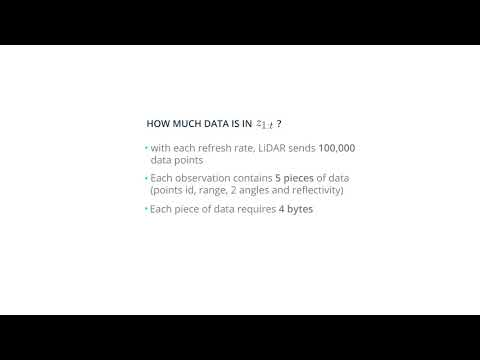

In [7]:
YouTubeVideo('wzcFHAf-9lo', width=960, height=540)

## Quiz
About how much data is in z_{1:t}?

Remember:

- The car has driven for 6 hours
- LIDAR refreshes 10 times per seconds (10 Hertz)
- LIDAR sends 100,000 data points per observation
- Each of the 100,000 observations contains 5 pieces of data
- Each piece of data requires 4 bytes

Answer: 430GB

# 11. How Much Data: Explanation

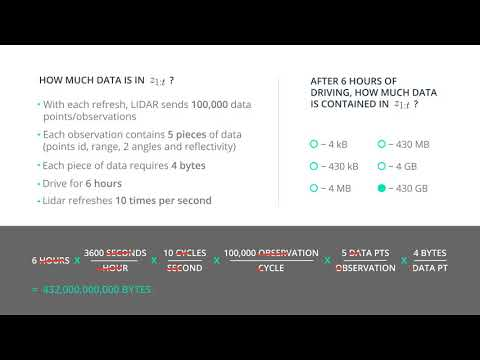

In [8]:
YouTubeVideo('PQV6gWuyVOs', width=960, height=540)

# 12. Derivation Outline

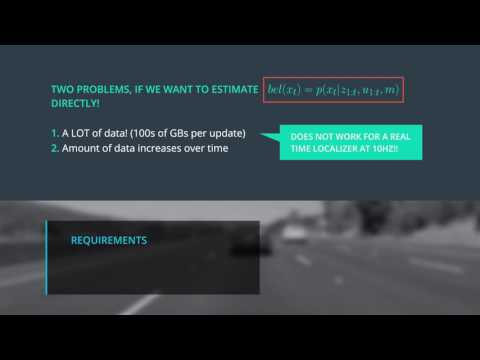

In [9]:
YouTubeVideo('coHodx-I56U', width=960, height=540)

# 13. Apply Bayes Rule with Additional Conditions

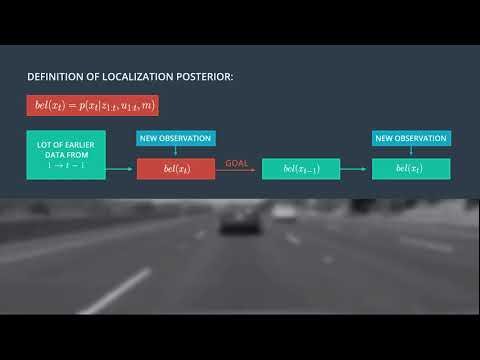

In [10]:
YouTubeVideo('RsHS2o3zjcw', width=960, height=540)

<img src="img/06-l-apply-bayes-rule-with-additional-conditions.00-01-30-28.still002.png">

We aim to estimate state beliefs $bel(x_t)$ without the need to carry our entire observation history. We will accomplish this by manipulating our posterior $p(x_t|z_{1:t-1},\mu_{1:t},m)$, obtaining a recursive state estimator. For this to work, we must demonstrate that our current belief $bel(x_t)$ can be expressed by the belief one step earlier $bel(x_{t-1})$, then use new data to update only the current belief. This recursive filter is known as the Bayes Localization filter or Markov Localization, and enables us to avoid carrying historical observation and motion data. We will achieve this recursive state estimator using Bayes Rule, the Law of Total Probability, and the Markov Assumption.

<img src="img/06-l-apply-bayes-rule-with-additional-conditions.00-01-48-09.still003.png">

We take the first step towards our recursive structure by splitting our observation vector $z_{1:t}$ into current observations $z_t$ and previous information $z_{1:t-1}$. The posterior can then be rewritten as $p(x_t|z_t,z_{1:t-1},u_{1:t}, m)$.

<img src="img/06-l-apply-bayes-rule-with-additional-conditions.00-02-12-10.still004.png">

Now, we apply Bayes' rule, with an additional challenge, the presence of multiple distributions on the right side (likelihood, prior, normalizing constant). How can we best handle multiple conditions within Bayes Rule? As a hint, we can use substitution, where $x_t$ is $a$, and the observation vector at time $t$, is $b$. Don’t forget to include $u$ and $m$ as well.

## Bayes Rule
$P(a \mid b) = \frac{P(b \mid a) , P(a)}{P(b)}$

## Quiz
Please apply Bayes Rule to determine the right side of Bayes rule, where the posterior, $P(a|b)$, is $p(x_t|z_t,z_{1:t-1},u_{1:t},m)$

(A) $\frac{p(x_t|z_t,z_{1:t-1},u_{1:t},m)p(z_t|x_t,z_{1:t-1},u_{1:t},m)}{p(z_t|z_{1:t-1},u_{1:t},m)}$

(B) $\frac{p(z_t|x_t,z_{1:t-1},u_{1:t},m)p(x_t|z_{1:t-1},u_{1:t},m)}{p(z_t|z_{1:t-1},u_{1:t},m)}$

(C) $\frac{p(z_t|x_t,z_{1:t-1},u_{1:t},m)p(x_t|z_{1:t-1},u_{1:t},m)}{p(x_t|z_{1:t-1},u_{1:t},m)} $
 

### QUIZ QUESTION
Choose the correct answer:

Answer: (B)


# 14. Bayes Rule and Law of Total Probability

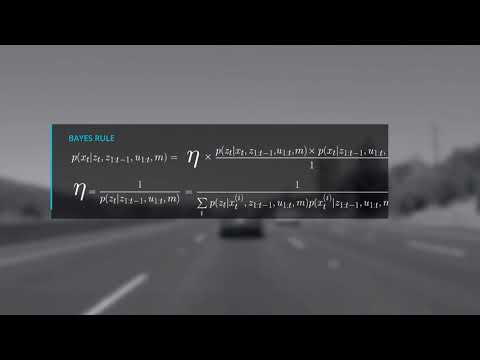

In [11]:
YouTubeVideo('p2qfHa9G7_k', width=960, height=540)

# 15. Total Probability and Markov Assumption

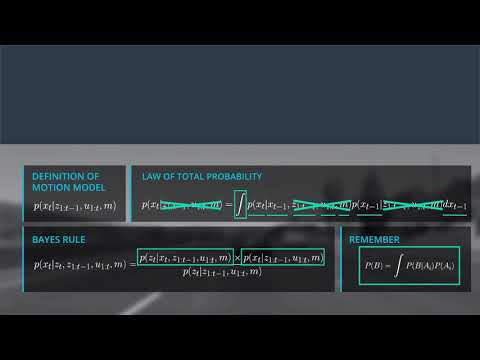

In [12]:
YouTubeVideo('9hGU7s5m8c0', width=960, height=540)

## Law of Total Probability
$P(B) = \sum\limits_{i-1}^{\infty} P(B|A_i)P(A_i)$


# 16. Markov Assumption for Motion Model: Quiz

## Markov Assumption for Motion Model Quiz
What do you think about these two assumptions:

(a) Since we (hypothetically) know in which state the system is at time step t-1, the past observations $z_{1:t-1}$ and controls $u_{1:t-1}$ would not provide us additional information to estimate the posterior for $x_t$, because they were already used to estimate $x_{t-1}$. This means, we can simplify $p(x_t|x_{t-1}, z_{1:t-1}, u_{1:t},m)$ to $p(x_t|x_{t-1}, u_t, m)$

(b) Since $u_t$ is “in the future” with reference to $x_{t-1}$, $u_t$ does not tell us much about $x_{t-1}$. This means the term $p(x_{t-1}|z_{1:t-1}, u_{1:t}, m)$ can be simplified to $p(x_{t-1}|z_{1:t-1}, u_{1:t-1}, m)$.

## QUIZ QUESTION
What do you think about the two assumptions?

- (A) Only assumption (a) is meaningful
- (B) Both assumptions are not meaningful
- (C) Only assumption (b) is meaningful
- (D) Both assumptions are meaningful

Answer: (D)

# 17. Markov Assumption for Motion Model: Explanation

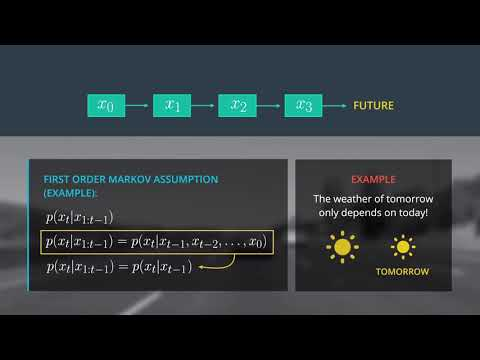

In [13]:
YouTubeVideo('YFLAFptKU5E', width=960, height=540)

## Markov Assumption
A Markov process is one in which the conditional probability distribution of future states (ie the next state) is dependent only upon the current state and not on other preceding states. This can be expressed mathematically as:

$P(x_t|x\_{1-t},....,x_{t-i},...., x_0) = P(x_t|x_{t-1})$

It is important to note that the current state may contain all information from preceding states. That is the case discussed in this lesson.

# 18. After Applying Markov Assumption: Quiz

## After Applying Markov Assumption Quiz

### Statement 1

After applying the Markov Assumption, the term $p(x_{t-1} | z_{1:t-1}, u_{1:t-1}, m)$ describes exactly the belief at $x_{t-1}$! This means we achieved a recursive structure!

### Statement 2

After applying the Markov Assumption, we can neglect the term $p(x_{t-1} | z_{1:t-1}, u_{1:t-1}, m)$ completely and we only have to estimate the posterior.

## QUIZ QUESTION
Which statement is correct?

Answer: Statement 1

# 19. Recursive Structure

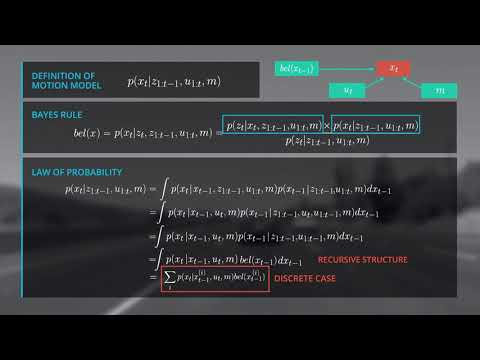

In [14]:
YouTubeVideo('d0GrWJeVFjU', width=960, height=540)

<img src="img/14-l-explain-recursive-structure-.00-00-34-00.still001.png">

We have achieved a very important step towards the final form of our recursive state estimator. Let’s see why. If we rewrite the second term in our integral to split $z_{1-t}$ to $z_{t-1}$ and $z_{t-2}$ we arrive at$ a function that is exactly the belief from the previous time step, namely $bel(x_{t-1})$.

<img src="img/14-l-explain-recursive-structure-.00-00-38-09.still002.png">

Now we can rewrite out integral as the belief of $x_{t-1}$.

<img src="img/14-l-explain-recursive-structure-.00-01-05-00.still003.png">

The amazing thing is that we have a recursive update formula and can now use the estimated state from the previous time step to predict the current state at t. This is a critical step in a recursive Bayesian filter because it renders us independent from the entire observation and control history. So in the graph structure, we will replace the previous state terms (highlighted) with our belief of the state at x at t -1 (next image).

<img src="img/14-l-explain-recursive-structure-.00-01-55-15.still004.png">

Finally, we replace the integral by a sum over all $x_i$ because we have a discrete localization scenario in this case, to get the same formula in Sebastian's lesson for localization. The process of predicting $x_t$ with a previous beliefs ($x_{t-1}$) and the transition model is technically a convolution. If you take a look to the formula again, it is essential that the belief at $x_t = 0$ is initialized with a meaningful assumption. It depends on the localization scenario how you set the belief or in other words, how you initialize your filter. For example, you can use GPS to get a coarse estimate of your location.

<img src="img/14-l-explain-recursive-structure-.00-02-36-09.still005.png">

Summing up, here is what we have learned so far:

- How to apply the law of total probability by including the new variable $x_{t-1}$.
- The Markov assumption, which is very important for probabilistic reasoning, and allows us to make recursive state estimation without carrying our entire history of information
- How to derive the recursive filter structure. Next you will implement a motion model in C++ and earn how to initialize our localizer.

# 20. Implementation Details for Motion Model

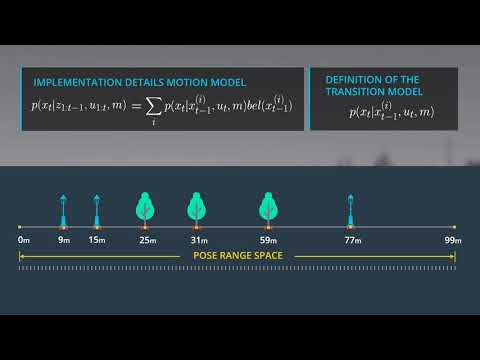

In [15]:
YouTubeVideo('O47bOcJm1eE', width=960, height=540)

# 21. Noise in Motion Model: Quiz

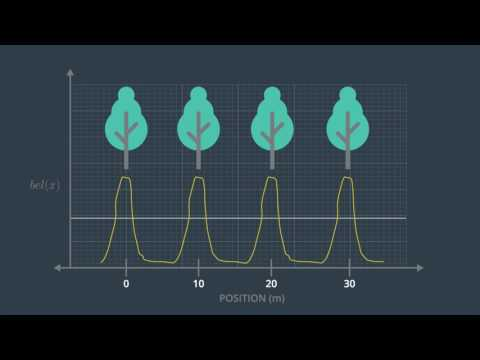

In [16]:
YouTubeVideo('zRbT36RTlhs', width=960, height=540)

Here is a screenshot of the quiz for reference:

<img src="img/screen-shot-2017-04-07-at-12.08.14-pm.png">

- Moves forward 10m with high noise: A
- Moves forward 10m with low noise: B
- Moves forward 10m with no noise: C

# 22. Noise in Motion Model: Solution

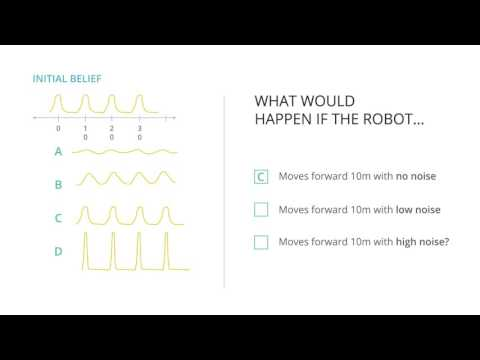

In [17]:
YouTubeVideo('zJ9NWz7IlOM', width=960, height=540)

# 23. Determine Probabilities

To implement these models in code, we need a function to which we can pass model parameters/values and return a probability. Fortunately, we can use a normalized probability density function (PDF). Let's revisit Sebastian's discussion of this topic.

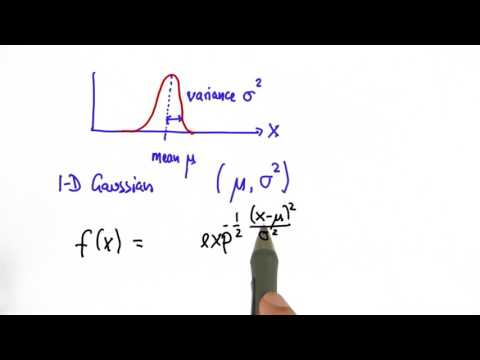

In [18]:
YouTubeVideo('6IhtnM1e0IY', width=960, height=540)

We have implemented this Gaussian Distribution as a C++ function, normpdf, and will practice using it at the end of this concept. normpdf accepts a value, a parameter, and a standard deviation, returning a probability.

## Additional Resources for Gaussian Distributions

- [Udacity's Statistics Course content on PDF](https://classroom.udacity.com/courses/st095/lessons/86217921/concepts/1020887710923)
- http://mathworld.wolfram.com/NormalDistribution.html
- http://stattrek.com/statistics/dictionary.aspx?definition=Probability_density_function

Let's practice using normpdf to determine transition model probabilities. Specifically, we need to determine the probability of moving from $x_{t-1}$ --> $x_t$. The value entered into normpdf will be the distance between these two positions. We will refer to potential values of these positions as pseudo position and pre-pseudo position. For example, if our pseudo position x is 8 and our pre-pseudo position is 5, our sample value will be 3, and our transition will be from x - 3 --> x.

To calculate our transition model probability, pass any difference in distances into normpdf along with our control parameter and position standard deviation.

### QUESTION 1 OF 2
Given pseudo position x and a control parameter of 1 (move 1 unit each time step), which pre-pseudo position maximizes our probability?

Answer: x-1. Our value will always be maximized when our parameter and value are equal. In this case our control value is 1 (move 1 unit per time step), generally speaking we will see our maximum probability at x - control_parameter.

```c++
//=================================================================================
// Name        : help_functions.h
// Version     : 2.0.0
// Copyright   : Udacity
//=================================================================================

#include <iostream>
#include "help_functions.h"

//TODO: assign a value, the difference in distances between x_t and x_{t-1}
//that maximizes the returned probability of norm_pdf

float value = ?;//YOUR VALUE HERE


float parameter = 1.0; //set as control parameter or observation measurement
float stdev = 1.0; //position or observation standard deviation

int main() {

    float prob = Helpers::normpdf(value, parameter, stdev);

    std::cout << prob << endl;

    return 0;
}
```

```c++
//=================================================================================
// Name        : help_functions.h
// Version     : 2.0.0
// Copyright   : Udacity
//=================================================================================

#ifndef HELP_FUNCTIONS_H_
#define HELP_FUNCTIONS_H_

#include <math.h>
#include <iostream>
#include <vector>

using namespace std;

class Helpers {
public:

	//definition of one over square root of 2*pi:
	constexpr static float STATIC_ONE_OVER_SQRT_2PI = 1/sqrt(2*M_PI) ;
	float ONE_OVER_SQRT_2PI = 1/sqrt(2*M_PI) ;

	/*****************************************************************************
	 * normpdf(X,mu,sigma) computes the probability function at values x using the
	 * normal distribution with mean mu and standard deviation std. x, mue and 
	 * sigma must be scalar! The parameter std must be positive. 
	 * The normal pdf is y=f(x;mu,std)= 1/(std*sqrt(2pi)) e[ -(x−mu)^2 / 2*std^2 ]
	*****************************************************************************/
	static float normpdf(float x, float mu, float std) {
	    return (STATIC_ONE_OVER_SQRT_2PI/std)*exp(-0.5*pow((x-mu)/std,2));
	}
	
};

#endif /* HELP_FUNCTIONS_H_ */
```

# 24. Motion Model Probabiity I

Now we will practice implementing the motion model to determine P(location) for our Bayesian filter. We discussed the derivation of the model [here](https://classroom.udacity.com/nanodegrees/nd013/parts/40f38239-66b6-46ec-ae68-03afd8a601c8/modules/2c318113-724b-4f9f-860c-cb334e6e4ad7/lessons/47f9b7a1-317f-4fab-88d3-bb3ce215d575/concepts/5bea5fef-4076-4c0c-b837-396755773a12) and [here](https://classroom.udacity.com/nanodegrees/nd013/parts/40f38239-66b6-46ec-ae68-03afd8a601c8/modules/2c318113-724b-4f9f-860c-cb334e6e4ad7/lessons/47f9b7a1-317f-4fab-88d3-bb3ce215d575/concepts/530a769e-637e-40ce-ab73-ad5293a24d88).

Recall that we derived the following recursive structure for the motion model:

$\int p(x_t|x_{t-1}, u_t, m)bel(x_{t-1})dx_{t-1}$ 

and that we will implement this in the discretized form:

$\sum\limits_{i} p(x_t|x_{t-1}^{(i)}, u_t, m)bel(x_{t-1}^{(i)})$

Let's remember what the summation above is doing. It's calculating the probability that the vehicle wound up at a given location, $x_t$.

How is the summation doing that? It's looking at each prior location where the vehicle could have been, $x_{t-1}$. Then the summation iterates over every possible prior location, $x_{t-1}^{(1)}...x_{t-1}^{(n)}$. For each possible prior location in that list, $x_{t-1}^{(i)}$, the summation yields the total probability that the vehicle really did start at that prior location and that it wound up at $x_t$.

That now raises the question, how do we calculate the individual probability that the vehicle really did start at that prior location and that it wound up at $x_t$, for each possible starting position $x_{t-1}$?

That's where each individual element of the summation contributes. The likelihood of starting at $x_{t-1}$ and arriving at $x_{t}$ is simply $p(x_t|x_{t-1}) * p(x_{t-1})$.

We can say the same thing, using different notation and incorporating all of our knowledge about the world, by writing: $p(x_t|x_{t-1}^{(i)}, u_t, m) * bel(x_{t-1}^{(i)})$


From the equation above we can see that our final position probability is the sum of n discretized motion model calculations, where each calculation is the product of the ith transition probability, $p(x_t|x_{t-1}^{(i)}, u_t, m)$, and ith belief state, $bel(x_{t-1}^{(i)})$. Let's try out a single, discreet calculation.

### ith Motion Model Probabiity:

$p(x_t|x_{t-1}^{(i)}, u_t, m) * bel(x_{t-1}^{(i)})$

### Discretized Motional Model Calculation
Given a transition probability of 3.99E-1 and a belief state $bel(x_{t-1})$ of 5.56E-2, what is the position probability returned by the motion model? Write the answer in scientific notation with an accuracy of two decimal places, for example 3.14E-15.


In the next concept, we will practice determining other values relevant to the motion model.

# 25. Motion Model Probability II


| pseudo_position (x) |	pre-pseudo_position	| delta position	| P(transition)	| $bel(x_{t-1})$ | P(position) |
|:--------:|:--------:|:--------:|:--------:|:------------:|:--------:|
| 7	| 1	| 6	| 1.49E-06	| 5.56E-02	| 8.27E-08 |
| 7	| 2	| 5	| 1.34E-04	| 5.56E-02	| 7.44E-06 |
| 7	| 3	| 4	| 4.43E-03	| 5.56E-02	| 2.46E-04| 
|7	|4	|?	|5.40E-02	|0.00E+00	|0.00E+00 |
|7	|5	|2	|?	| 0.00E+00	|0.00E+00 |
|7	|6	|1	|3.99E-01	|0.00E+00	| 0.00E+00 |
|7  |7	|0	|2.42E-01	|?	| 1.66E-03 |
|7	|8	|-1	|5.40E-02	|1.79E-03	| ? |

## Delta Position
What is difference in position for an x of 7 and a pre-pseudo position of 4?

Answer: pseudo_position - pre-pseudo_position = 7 - 4 = 3

## Transition Probability
Use normpdf (bottom of page) to determine the transition probability for x = 7 and a pre-pseudo_position of 5, and a control parameter of 1, and a standard deviation of 1. The transition probability can be determined through normpdf(delta_position, control_parameter, position_stdev). The answer must be in scientific notation with two decimal place accuracy, for example 3.14E-15.

Answer:

```c++
#include <iostream>
#include "help_functions.h"

//Assign 2 to the value term
//This is 7 - 5 = 2
float value = 2;

float parameter = 1.0; //set as control parameter or observation measurement
float stdev = 1.0; //position or observation standard deviation

int main() {

    float prob = Helpers::normpdf(value, parameter, stdev);

    std::cout << prob << endl;

    return 0;
}
```

## Determine the belief state
In practice we only set our initial belief state, but making the following calculation is helpful in building intuition. What is the belief state $bel(x_{t-1})$ for the penultimate row of our table above? Write the answer in scientific notation with an accuracy of two decimal places, for example 3.14E-15.

Answer:
Our positon probability is the product of the transition probability and our belief state at t - 1. Rearranging yields:

1.66E-03/2.42E-01 = 6.86E-03

## Position Probability
What is the discretized position probability for x = 7 and a pre-pseudo_position of 8, given the belief state in the table above? Write the answer in scientific notation with an accuracy of two decimal places, for example 3.14E-15.

Ansqer: Our positon probability is the product of the transition probability and our belief state for our pre-pseudo position.

5.40E-02 * 1.79E-03 = 9.66E-05

<hr>

We have completed our table of discretized calculation for each ith positon probability value. To determine the final probability returned by the motion model, we must sum the probabilities.



## Aggregating Discretized P(position)
Given the table above, what is the final probability returned by our motion model. Enter the answer in scientific notation with an accuracy of two decimal places, for example 3.14E-15.

AnswerL By summing the discrete probabilities from the table, we obtain the total probability, which estimates the probability from a continuous function.

8.27E-08 + 7.44E-06 + 2.46E-04 + 0.00E+00 + 0.00E+00 + 0.00E+00 + 1.66E-03 + 9.66E-05 = 2.02E-03

```c++
//=================================================================================
// Name        : main.cc
// Version     : 2.0.0
// Copyright   : Udacity
//=================================================================================

#include <iostream>
#include "help_functions.h"

//TODO: assign a value, the difference in distances between x_t and x_{t-1}
//for an x of 7 and a pre-pseudo position of 5

float value = ?;//YOUR VALUE HERE


float parameter = 1.0; //set as control parameter or observation measurement
float stdev = 1.0; //position or observation standard deviation

int main() {

    float prob = Helpers::normpdf(value, parameter, stdev);

    std::cout << prob << endl;

    return 0;
}
```

```c++
//=================================================================================
// Name        : help_functions.h
// Version     : 2.0.0
// Copyright   : Udacity
//=================================================================================

#ifndef HELP_FUNCTIONS_H_
#define HELP_FUNCTIONS_H_

#include <math.h>
#include <iostream>
#include <vector>

using namespace std;

class Helpers {
public:

	//definition of one over square root of 2*pi:
	constexpr static float STATIC_ONE_OVER_SQRT_2PI = 1/sqrt(2*M_PI) ;
	float ONE_OVER_SQRT_2PI = 1/sqrt(2*M_PI) ;

	/*****************************************************************************
	 * normpdf(X,mu,sigma) computes the probability function at values x using the
	 * normal distribution with mean mu and standard deviation std. x, mue and 
	 * sigma must be scalar! The parameter std must be positive. 
	 * The normal pdf is y=f(x;mu,std)= 1/(std*sqrt(2pi)) e[ -(x−mu)^2 / 2*std^2 ]
	*****************************************************************************/
	static float normpdf(float x, float mu, float std) {
	    return (STATIC_ONE_OVER_SQRT_2PI/std)*exp(-0.5*pow((x-mu)/std,2));
	}
	
};

#endif /* HELP_FUNCTIONS_H_ */
```

Recall that the transition probability can be determined through norm_pdf(delta_position, control_parameter, position_stdev)

In the next concept we will implement the motion model in C++.

## Reference Equations

- Discretized Motion Model:
    - $\sum\limits_{i} p(x_t|x_{t-1}^{(i)}, u_t, m)bel(x_{t-1}^{(i)})$
- Transition Model:
    - $p(x_t|x_{t-1}^{(i)}, u_t, m)$
- ith Motion Model Probability:
    - $p(x_t|x_{t-1}^{(i)} u_t, m) *bel(x_{t-1}^{(i)})$



# 26. Coding the Motion Model

Now that we have manually calculated each step for determining the **motion model** probability, we will implement these steps in a function. The starter code below steps through each position x, calls the **motion_model** function and prints the results to stdout. To complete this exercise fill in the motion_model function which will involve:

- For each $x_{t}$
    - Calculate the transition probability for each potential value $x_{t-1}$	 
    - Calculate the discrete motion model probability by multiplying the transition model probability by the belief state (prior) for $x_{t-1}
- Return total probability (sum) of each discrete probability

## main.cpp

```c++
#include <iostream>
#include <algorithm>
#include <vector>

#include "helpers.h"
using namespace std;

std::vector<float> initialize_priors(int map_size, std::vector<float> landmark_positions,
                                     float control_stdev);

float motion_model(float pseudo_position, float movement, std::vector<float> priors,
                   int map_size, int control_stdev);

int main() {
    
    //set standard deviation of control:
    float control_stdev = 1.0f;

    //meters vehicle moves per time step
    float movement_per_timestep = 1.0f;

    //number of x positions on map
    int map_size = 25;

    //initialize landmarks
    std::vector<float> landmark_positions {5, 10, 20};
    
    // initialize priors
    std::vector<float> priors = initialize_priors(map_size, landmark_positions,
                                                  control_stdev);
    
    //step through each pseudo position x (i)    
    for (unsigned int i = 0; i < map_size; ++i) {
        float pseudo_position = float(i);

        //get the motion model probability for each x position
        float motion_prob = motion_model(pseudo_position, movement_per_timestep,
                            priors, map_size, control_stdev);
        
        //print to stdout
        std::cout << pseudo_position << "\t" << motion_prob << endl;
    }    

    return 0;
};

//TODO, implement the motion model: calculates prob of being at an estimated position at time t
float motion_model(float pseudo_position, float movement, std::vector<float> priors,
                   int map_size, int control_stdev) {

    //initialize probability
    float position_prob = 0.0f;
    
    //YOUR CODE HERE

    
    return position_prob;
}

//initialize priors assumimg vehicle at landmark +/- 1.0 meters position stdev
std::vector<float> initialize_priors(int map_size, std::vector<float> landmark_positions,
                                     float control_stdev) {
//initialize priors assumimg vehicle at landmark +/- 1.0 meters position stdev

    //set all priors to 0.0
    std::vector<float> priors(map_size, 0.0);

    //set each landmark positon +/1 to 1.0/9.0 (9 possible postions)
    float normalization_term = landmark_positions.size() * (control_stdev * 2 + 1);
    for (unsigned int i = 0; i < landmark_positions.size(); i++){
        int landmark_center = landmark_positions[i];
        priors[landmark_center] = 1.0f/normalization_term;
        priors[landmark_center - 1] = 1.0f/normalization_term;
        priors[landmark_center + 1] = 1.0f/normalization_term;
    }
    return priors;
}
```

## helpers.h
```c++
//=================================================================================
// Name        : help_functions.h
// Version     : 2.0.0
// Copyright   : Udacity
//=================================================================================

#ifndef HELP_FUNCTIONS_H_
#define HELP_FUNCTIONS_H_

#include <math.h>
#include <iostream>
#include <vector>
#include <fstream>
#include <sstream>
#include <iomanip>

using namespace std;

class Helpers {
public:

	//definition of one over square root of 2*pi:
	constexpr static float STATIC_ONE_OVER_SQRT_2PI = 1/sqrt(2*M_PI) ;
	float ONE_OVER_SQRT_2PI = 1/sqrt(2*M_PI) ;

	/*****************************************************************************
	 * normpdf(X,mu,sigma) computes the probability function at values x using the
	 * normal distribution with mean mu and standard deviation std. x, mue and 
	 * sigma must be scalar! The parameter std must be positive. 
	 * The normal pdf is y=f(x;mu,std)= 1/(std*sqrt(2pi)) e[ -(x−mu)^2 / 2*std^2 ]
	*****************************************************************************/
	static float normpdf(float x, float mu, float std) {
	    return (STATIC_ONE_OVER_SQRT_2PI/std)*exp(-0.5*pow((x-mu)/std,2));
	}
	
};

#endif /* HELP_FUNCTIONS_H_ */

```

# 26. Solution: Coding the Motion Model

Below is one possible implementation of the motion model.

## main.cpp
```c++
#include <iostream>
#include <algorithm>
#include <vector>

#include "helpers.h"
using namespace std;

std::vector<float> initialize_priors(int map_size, std::vector<float> landmark_positions,
                                     float control_stdev);

float motion_model(float pseudo_position, float movement, std::vector<float> priors,
                   int map_size, int control_stdev);

int main() {
    
    //set standard deviation of control:
    float control_stdev = 1.0f;

    //meters vehicle moves per time step
    float movement_per_timestep = 1.0f;

    //number of x positions on map
    int map_size = 25;

    //initialize landmarks
    std::vector<float> landmark_positions {5, 10, 20};
    
    // initialize priors
    std::vector<float> priors = initialize_priors(map_size, landmark_positions,
                                                  control_stdev);
    
    //step through each pseudo position x (i)    
    for (unsigned int i = 0; i < map_size; ++i) {
        float pseudo_position = float(i);

        //get the motion model probability for each x position
        float motion_prob = motion_model(pseudo_position, movement_per_timestep,
                            priors, map_size, control_stdev);
        
        //print to stdout
        std::cout << pseudo_position << "\t" << motion_prob << endl;
    }    

    return 0;
};

//motion model: calculates prob of being at an estimated position at time t
float motion_model(float pseudo_position, float movement, std::vector<float> priors,
                   int map_size, int control_stdev) {

    //initialize probability
    float position_prob = 0.0f;

    //loop over state space for all possible positions x (convolution):
    for (unsigned int j=0; j< map_size; ++j) {
        float next_pseudo_position = float(j);
                //distance from i to j
        float distance_ij = pseudo_position-next_pseudo_position;

        //transition probabilities:
        float transition_prob = Helpers::normpdf(distance_ij, movement, 
                            control_stdev);
        //estimate probability for the motion model, this is our prior
        position_prob += transition_prob*priors[j];
    }
    return position_prob;
}

//initialize priors assumimg vehicle at landmark +/- 1.0 meters position stdev
std::vector<float> initialize_priors(int map_size, std::vector<float> landmark_positions,
                                     float control_stdev) {
//initialize priors assumimg vehicle at landmark +/- 1.0 meters position stdev

    //set all priors to 0.0
    std::vector<float> priors(map_size, 0.0);

    //set each landmark positon +/1 to 1.0/9.0 (9 possible postions)
    float normalization_term = landmark_positions.size() * (control_stdev * 2 + 1);
    for (unsigned int i = 0; i < landmark_positions.size(); i++){
        int landmark_center = landmark_positions[i];
        priors[landmark_center] = 1.0f/normalization_term;
        priors[landmark_center - 1] = 1.0f/normalization_term;
        priors[landmark_center + 1] = 1.0f/normalization_term;

    }
    return priors;
}
```

## helpers.h
```c++
//=================================================================================
// Name        : help_functions.h
// Version     : 2.0.0
// Copyright   : Udacity
//=================================================================================

#ifndef HELP_FUNCTIONS_H_
#define HELP_FUNCTIONS_H_

#include <math.h>
#include <iostream>
#include <vector>
#include <fstream>
#include <sstream>
#include <iomanip>

using namespace std;

class Helpers {
public:

	//definition of one over square root of 2*pi:
	constexpr static float STATIC_ONE_OVER_SQRT_2PI = 1/sqrt(2*M_PI) ;
	float ONE_OVER_SQRT_2PI = 1/sqrt(2*M_PI) ;

	/*****************************************************************************
	 * normpdf(X,mu,sigma) computes the probability function at values x using the
	 * normal distribution with mean mu and standard deviation std. x, mue and 
	 * sigma must be scalar! The parameter std must be positive. 
	 * The normal pdf is y=f(x;mu,std)= 1/(std*sqrt(2pi)) e[ -(x−mu)^2 / 2*std^2 ]
	*****************************************************************************/
	static float normpdf(float x, float mu, float std) {
	    return (STATIC_ONE_OVER_SQRT_2PI/std)*exp(-0.5*pow((x-mu)/std,2));
	}
	
};

#endif /* HELP_FUNCTIONS_H_ */

```

# 28. Observation Model Introduction

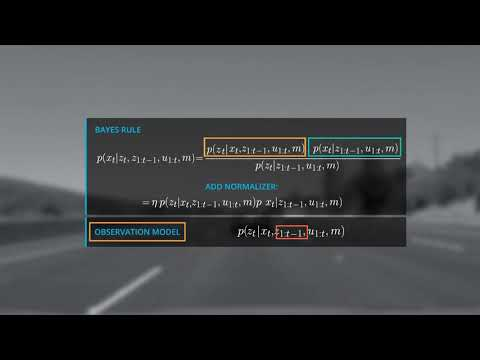

In [3]:
YouTubeVideo('SDM1aVqRBCk', width=960, height=540)

## Observation Model

<center>$p(z_t|x_t,z_{1:t-1},u_{1:t},m)$</center>

## Motion Model

<center>$p(x_t|z_{1:t-1},u_{1:t},m)$</center>

## Quiz: Simplifying the Observation Model
What “trick” can we use there, which helps us to manipulate/simplify the observation model:
- (A) Using well-known Bayes Rule again!
- (B) Using the law of total Probability!
- (C) Using the Markov Assumption (Completeness of the State Assumption)

Answer: C

# 29. Markov Assumption for Observation Model

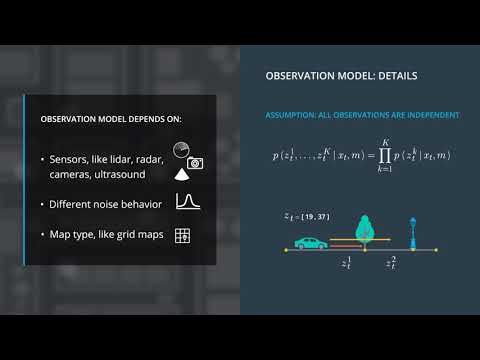

In [4]:
YouTubeVideo('dyDjINdrIz0', width=960, height=540)

<img src="img/20-i-markov-assumption-for-observation-model-first-try.00-00-22-16.still001.png">

The Markov assumption can help us simplify the observation model. Recall that the Markov Assumption is that the next state is dependent only upon the preceding states and that preceding state information has already been used in our state estimation. As such, we can ignore terms in our observation model prior to $x_t$ since these values have already been accounted for in our current state and assume that t is independent of previous observations and controls.

<img src="img/20-i-markov-assumption-for-observation-model-first-try.00-00-36-11.still002.png">

With these assumptions we simplify our posterior distribution such that the observations at t are dependent only on x at time t and the map.

<img src="img/20-i-markov-assumption-for-observation-model-first-try.00-01-18-09.still003.png">

Since $z_t$ can be a vector of multiple observations we rewrite our observation model to account for the observation models for each single range measurement. We assume that the noise behavior of the individual range values $z_t^1$ to $z_t^k$ is independent and that our observations are independent, allowing us to represent the observation model as a product over the individual probability distributions of each single range measurement. Now we must determine how to define the observation model for a single range measurement.

<img src='img/20-i-markov-assumption-for-observation-model-first-try.00-03-23-08.still004.png'>

In general there exists a variety of observation models due to different sensor, sensor specific noise behavior and performance, and map types. For our 1D example we assume that our sensor measures to the n closest objects in the driving direction, which represent the landmarks on our map. We also assume that observation noise can be modeled as a Gaussian with a standard deviation of 1 meter and that our sensor can measure in a range of 0 – 100 meters.

To implement the observation model we use the given state $x_t$, and the given map to estimate pseudo ranges, which represent the true range values under the assumption that your car would stand at a specific position $x_t$, on the map. For example, if our car is standing at position 20 it would make use $x_t$, and m to make pseudo range ($z_t^*$) observations in the order of the first landmark to the last landmark or 5, 11, 39, and 57 meters. Compared to our real observations ($z_t = [19, 37]$) the position $x_t, = 20$ seems unlikely and our observation would rather fit to a position around 40.

Based on this example the observation model for a single range measurement is defined by the probability of the following normal distribution $p(z_t^k|x_t )\tilde\ N(z_t^k,z_t^{*k},\sigma z_t)$) where $z_t^{*k}$ is the mean. This insight will ultimately allow us to implement the observation model in c++.

# 30. Finalize the Bayes Localization Filter

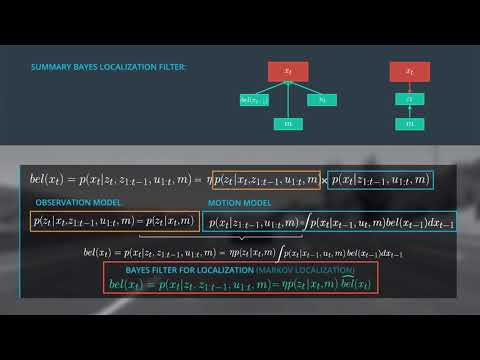

In [5]:
YouTubeVideo('teVw2J-_6ZE', width=960, height=540)

<img src="img/21-i-finalize-the-bayes-localization-filter.00-01-00-15.still001.png">

We have accomplished a lot in this lesson.

- [Starting with the generalized form of Bayes Rule](https://classroom.udacity.com/nanodegrees/nd013/parts/40f38239-66b6-46ec-ae68-03afd8a601c8/modules/2c318113-724b-4f9f-860c-cb334e6e4ad7/lessons/47f9b7a1-317f-4fab-88d3-bb3ce215d575/concepts/d56d2238-9528-46c8-b1e1-ad086a73f3bb) we expressed our posterior, the belief of x at t as \etaη (normalizer) multiplied with the observation model and the motion model.
- [We simplified the observation model](https://classroom.udacity.com/nanodegrees/nd013/parts/40f38239-66b6-46ec-ae68-03afd8a601c8/modules/2c318113-724b-4f9f-860c-cb334e6e4ad7/lessons/47f9b7a1-317f-4fab-88d3-bb3ce215d575/concepts/17fdc941-ea11-4438-b8b7-4dedf70283fd) using the Markov assumption to determine the probability of z at time t, given only x at time t, and the map.
- We expressed the [motion model](https://classroom.udacity.com/nanodegrees/nd013/parts/40f38239-66b6-46ec-ae68-03afd8a601c8/modules/2c318113-724b-4f9f-860c-cb334e6e4ad7/lessons/47f9b7a1-317f-4fab-88d3-bb3ce215d575/concepts/530a769e-637e-40ce-ab73-ad5293a24d88) as a recursive state estimator using the Markov assumption and the law of total probability, resulting in a model that includes our belief at t – 1 and our transition model.
- Finally we derived the general Bayes Filter for Localization (Markov Localization) by expressing our belief of x at t as a simplified version of our original posterior expression (top equation), $\eta$ multiplied by the simplified observation model and the motion model. Here the motion model is written as $\hat{bel}$, a prediction model.

<img src="img/21-i-finalize-the-bayes-localization-filter.00-01-17-24.still002.png">

The Bayes Localization Filter dependencies can be represented as a graph, by combining our sub-graphs. To estimate the new state x at t we only need to consider the previous belief state, the current observations and controls, and the map.

<img src="img/21-i-finalize-the-bayes-localization-filter.00-01-35-19.still003.png">

It is a common practice to represent this filter without the belief $x_t$ and to remove the map from the motion model. Ultimately we define $bel(x_t)$ as the following expression.

## Bayes Filter for Localization (Markov Localization)
$bel(x_t) = p(x_t|z_t,z_{1:t-1},\mu_{1:t},m) = \eta *p(z_t|x_t,m) \hat{bel}(x_t)$


# 31. Bayes Filter Theory Summary

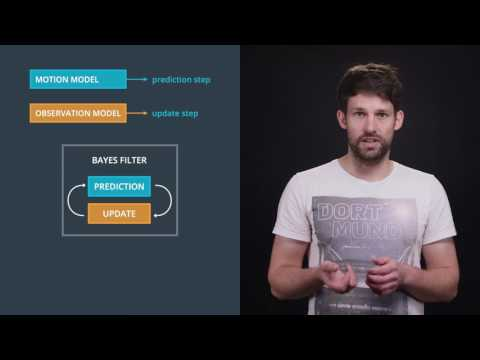

In [6]:
YouTubeVideo('lMyu2-PZGuk', width=960, height=540)

<img src="img/22-l-bayes-filter-theory-summary.00-00-22-29.still001.png">

The image above sums up the core achievements of this lesson.

- The Bayes Localization Filter Markov Localization is a general framework for recursive state estimation.
- That means this framework allows us to use the previous state (state at t-1) to estimate a new state (state at t) using only current observations and controls (observations and control at t), rather than the entire data history (data from 0:t).

<img src="img/22-l-bayes-filter-theory-summary.00-00-52-03.still002.png">

- The motion model describes the prediction step of the filter while the observation model is the update step.
- The state estimation using the Bayes filter is dependent upon the interaction between prediction (motion model) and update (observation model steps) and all the localization methods discussed so far are realizations of the Bayes filter.
- In the next few sections we will learn how to estimate pseudo ranges, calculate the observation model probability, and complete the implementation of the observation model in C++.

# 32. Observation Model Probability

We will complete our Bayes' filter by implementing the observation model. The observation model uses pseudo range estimates and observation measurements as inputs. Let's recap what is meant by a pseudo range estimate and an observation measurement.

For the figure below, the top 1d map (green car) shows our observation measurements. These are the distances from our actual car position at time t, to landmarks, as detected by sensors. In this example, those distances are 19m and 37m.

The bottom 1d map (yellow car) shows our pseudo range estimates. These are the distances we would expect given the landmarks and assuming a given position x at time t, of 20m. In this example, those distances are 5, 11, 39, and 57m.

<img src="img/obs-model-measurements-pseudoranges.png">

The observation model will be implemented by performing the following at each time step:

- Measure the range to landmarks up to 100m from the vehicle, in the driving direction (forward)
- Estimate a pseudo range from each landmark by subtracting pseudo position from the landmark position
- Match each pseudo range estimate to its closest observation measurement
- For each pseudo range and observation measurement pair, calculate a probability by passing relevant values to norm_pdf: norm_pdf(observation_measurement, pseudo_range_estimate, observation_stdev)
- Return the product of all probabilities

Why do we multiply all the probabilities in the last step? Our final signal (probability) must reflect all pseudo range, observation pairs. This blends our signal. For example, if we have a high probability match (small difference between the pseudo range estimate and the observation measurement) and low probability match (large difference between the pseudo range estimate and the observation measurement), our resultant probability will be somewhere in between, reflecting the overall belief we have in that state.

Let's practice this process using the following information and norm_pdf.

- pseudo position: x = 10m
- vector of landmark positions from our map: [6m, 15m, 21m, 40m]
- observation measurements: [5.5m, 11m]
- observation standard deviation: 1.0m

### Estimate Pseudo Ranges
Our first step is to estimate pseudo ranges, please enter the response as a vector with no spaces, in ascending order. For example [5, 4, 7, 20].

Answer

- 6m is not in the driving direction, so we reject this
- The remaining calculations are shown within the vector: [15-10,21-10,40-10] = [5,11,30]

### Association
Match each observation measurement with the nearest estimated pseudo range. We will only use each measurement and pseudo range once. Enter each pair as a vector of tuples, with no spaces, with tuples ordered as (observation,pseudo_range). For example [(5.5,10),(11,15)]

Answer: [(5.5,5), (11,11)]

### Determine Probabilities
Calculate a probability for each observation measurement and pseudo range estimate pair by passing relevant data to norm_pdf Enter your response as a vector of probabilities in scientific notation with an accuracy of two decimal places, and no spaces. For example [3.14E-15,1.23E-5].

### main.cpp

```c++
//=================================================================================
// Name        : help_functions.h
// Version     : 2.0.0
// Copyright   : Udacity
//=================================================================================

#include <iostream>
#include "help_functions.h"

float value = ?; //TODO: assign a value, the difference in distances
float parameter = 1.0; //set as control parameter or observation measurement
float stdev = 1.0; //position or observation standard deviation

int main() {

    float prob = Helpers::normpdf(value, parameter, stdev);

    std::cout << prob << endl;

    return 0;
}
```

### help_functions.h
```c++
//=================================================================================
// Name        : help_functions.h
// Version     : 2.0.0
// Copyright   : Udacity
//=================================================================================

#ifndef HELP_FUNCTIONS_H_
#define HELP_FUNCTIONS_H_

#include <math.h>
#include <iostream>
#include <vector>

using namespace std;

class Helpers {
public:

	//definition of one over square root of 2*pi:
	constexpr static float STATIC_ONE_OVER_SQRT_2PI = 1/sqrt(2*M_PI) ;
	float ONE_OVER_SQRT_2PI = 1/sqrt(2*M_PI) ;

	/*****************************************************************************
	 * normpdf(X,mu,sigma) computes the probability function at values x using the
	 * normal distribution with mean mu and standard deviation std. x, mue and 
	 * sigma must be scalar! The parameter std must be positive. 
	 * The normal pdf is y=f(x;mu,std)= 1/(std*sqrt(2pi)) e[ -(x−mu)^2 / 2*std^2 ]
	*****************************************************************************/
	static float normpdf(float x, float mu, float std) {
	    return (STATIC_ONE_OVER_SQRT_2PI/std)*exp(-0.5*pow((x-mu)/std,2));
	}
	
};

#endif /* HELP_FUNCTIONS_H_ */
```

Recall that our observation model probability can be determined through norm_pdf(observation_measurement, pseudo_range_estimate, observation_stdev).


### Solution

Use the following with norm_pdf pressing "test run" to return each probability.

```c++
float value = 5.5; //TODO: assign a value, the difference in distances
float parameter = 5; //set as control parameter or observation measurement
float stdev = 1.0; //position or observation standard deviation
```

and

```c++
float value = 11; //TODO: assign a value, the difference in distances
float parameter = 11; //set as control parameter or observation measurement
float stdev = 1.0; //position or observation standard deviation
```

### Result in vector form
[3.99E-1,3.52E-1] Please note that grader allows any order and allows for slight differences in precision.

### Observation Model Probability

To complete our observation model probability, determine the product of each observation probability from the previous quiz. Remember that our observation model probability is the product of the probabilities determined using each (pseudo_range, observation) pair and norm_pdf. Enter your response in scientific notation with an accuracy of two decimal places. For example 2.99E-1.

Answer: 3.99E-01 * 3.52E-01 = 1.40E-01 Please note that the grader allows for slight differences in precision.

<hr>
Now that we have implemented the observation model manually, we will try out a code implementation in the next few concepts.



# 33. Get Pseudo Ranges

In the previous exercises we manually executed the steps for determining pseudo ranges and our observation model probability. Now let's implement a function that accepts a vector of landmark positions, a pseudo position (x), and returns a vector of sorted (ascending) pseudo ranges. Later, we will use the pseudo range vector as an input for our observation model function.

To implement the pseudo_range_estimator function we must do the following for each pseudo position x:

- For each landmark position:
    - determine the distance between each pseudo position x and each landmark position
    - if the distance is positive (landmark is forward of the pseudo position) push the distance to the pseudo range vector
    - sort the pseudo range vector in ascending order
    - return the pseudo range vector

There may be missing x values in the output. This is because not all x values have a forward landmark (positive pseudo range).



### main.cpp

```c++
#include <iostream>
#include <algorithm>
#include <vector>

#include "helpers.h"
using namespace std;

//set standard deviation of control:
float control_stdev = 1.0f;

//meters vehicle moves per time step
float movement_per_timestep = 1.0f;

//number of x positions on map
int map_size = 25;

//define landmarks
std::vector<float> landmark_positions {5, 10, 12, 20};



std::vector<float> pseudo_range_estimator(std::vector<float> landmark_positions, float pseudo_position);


int main() {    
    
    //step through each pseudo position x (i)
    for (unsigned int i = 0; i < map_size; ++i) {
        float pseudo_position = float(i);
        //get pseudo ranges
        std::vector<float> pseudo_ranges = pseudo_range_estimator(landmark_positions, pseudo_position);

       //print to stdout
        if (pseudo_ranges.size() >0) {
            for (unsigned int s = 0; s < pseudo_ranges.size(); ++s) {
                std::cout << "x: " << i << "\t" << pseudo_ranges[s] << endl;
            }
            std::cout << "-----------------------" << endl;
        }   
    } 

    return 0;
};

//TODO: Complete pseudo range estimator function
std::vector<float> pseudo_range_estimator(std::vector<float> landmark_positions, float pseudo_position) {
    
    //define pseudo observation vector:
    std::vector<float> pseudo_ranges;
            
    //loop over number of landmarks and estimate pseudo ranges:
        //YOUR CODE HERE
        

    //sort pseudo range vector:
        //YOUR CODE HERE
    
    return pseudo_ranges;
}
```

### helpers.h

```c++
//=================================================================================
// Name        : help_functions.h
// Version     : 2.0.0
// Copyright   : Udacity
//=================================================================================

#ifndef HELP_FUNCTIONS_H_
#define HELP_FUNCTIONS_H_

#include <math.h>
#include <iostream>
#include <vector>
#include <fstream>
#include <sstream>
#include <iomanip>

using namespace std;

class Helpers {
public:

	//definition of one over square root of 2*pi:
	constexpr static float STATIC_ONE_OVER_SQRT_2PI = 1/sqrt(2*M_PI) ;
	float ONE_OVER_SQRT_2PI = 1/sqrt(2*M_PI) ;

	/*****************************************************************************
	 * normpdf(X,mu,sigma) computes the probability function at values x using the
	 * normal distribution with mean mu and standard deviation std. x, mue and 
	 * sigma must be scalar! The parameter std must be positive. 
	 * The normal pdf is y=f(x;mu,std)= 1/(std*sqrt(2pi)) e[ -(x−mu)^2 / 2*std^2 ]
	*****************************************************************************/
	static float normpdf(float x, float mu, float std) {
	    return (STATIC_ONE_OVER_SQRT_2PI/std)*exp(-0.5*pow((x-mu)/std,2));
	}
	
};

#endif /* HELP_FUNCTIONS_H_ */
```

# 34. Solution: Get Pseudo Ranges

### main.cpp
```c++
#include <iostream>
#include <algorithm>
#include <vector>

#include "helpers.h"
using namespace std;

//set standard deviation of control:
float control_stdev = 1.0f;

//meters vehicle moves per time step
float movement_per_timestep = 1.0f;

//number of x positions on map
int map_size = 25;

//define landmarks
std::vector<float> landmark_positions {5, 10, 12, 20};



std::vector<float> pseudo_range_estimator(std::vector<float> landmark_positions, float pseudo_position);


int main() {        

    //step through each pseudo position x (i)
    for (unsigned int i = 0; i < map_size; ++i) {
        float pseudo_position = float(i);
        //get pseudo ranges
        std::vector<float> pseudo_ranges = pseudo_range_estimator(landmark_positions, pseudo_position);

        //print to stdout
        if (pseudo_ranges.size() >0) {
            for (unsigned int s = 0; s < pseudo_ranges.size(); ++s) {
                std::cout << "x: " << i << "\t" << pseudo_ranges[s] << endl;
            }
            std::cout << "-----------------------" << endl;
        }   
    } 

    return 0;
};

std::vector<float> pseudo_range_estimator(std::vector<float> landmark_positions, float pseudo_position) {
    
    //define pseudo observation vector:
    std::vector<float> pseudo_ranges;
            
    //loop over number of landmarks and estimate pseudo ranges:
        for (unsigned int l=0; l< landmark_positions.size(); ++l) {

            //estimate pseudo range for each single landmark 
            //and the current state position pose_i:
            float range_l = landmark_positions[l] - pseudo_position;
            
            //check if distances are positive: 
            if (range_l > 0.0f) {
                pseudo_ranges.push_back(range_l);
            }
        }

    //sort pseudo range vector:
    sort(pseudo_ranges.begin(), pseudo_ranges.end());
    
    return pseudo_ranges;
}
```


### helpers.h
```c++
//=================================================================================
// Name        : help_functions.h
// Version     : 2.0.0
// Copyright   : Udacity
//=================================================================================

#ifndef HELP_FUNCTIONS_H_
#define HELP_FUNCTIONS_H_

#include <math.h>
#include <iostream>
#include <vector>
#include <fstream>
#include <sstream>
#include <iomanip>

using namespace std;

class Helpers {
public:

	//definition of one over square root of 2*pi:
	constexpr static float STATIC_ONE_OVER_SQRT_2PI = 1/sqrt(2*M_PI) ;
	float ONE_OVER_SQRT_2PI = 1/sqrt(2*M_PI) ;

	/*****************************************************************************
	 * normpdf(X,mu,sigma) computes the probability function at values x using the
	 * normal distribution with mean mu and standard deviation std. x, mue and 
	 * sigma must be scalar! The parameter std must be positive. 
	 * The normal pdf is y=f(x;mu,std)= 1/(std*sqrt(2pi)) e[ -(x−mu)^2 / 2*std^2 ]
	*****************************************************************************/
	static float normpdf(float x, float mu, float std) {
	    return (STATIC_ONE_OVER_SQRT_2PI/std)*exp(-0.5*pow((x-mu)/std,2));
	}
	
};

#endif /* HELP_FUNCTIONS_H_ */

```

# 35. Coding the Observation Model

The final individual model we will implement is the observation model. The observation model accepts the pseudo range vector from the previous assignment, an observation vector (from vehicle sensors), and returns the observation model probability. Ultimately, we will multiply this by the motion model probability, then normalize to produce the belief state for the current time step.

The starter code below steps through each pseudo position x, calls the observation_model function and prints the results to standout. To complete this exercise fill in the observation_model function.

To implement the observation_model function we must do the following for each pseudo position x:

- For each observation:
    - determine if a pseudo range vector exists the current pseudo position x
    - if the vector exists extract and store the minimum distance, element 0 of the sorted vector, and remove that element (so we don't re-use it). This will be passed to norm_pdf
    - if the pseudo range vector does not exist, pass the maximum distance to norm_pdf
    - use norm_pdf to determine the observation model probability
    - return the total probability

### main.cpp
```c++
#include <iostream>
#include <algorithm>
#include <vector>

#include "helpers.h"
using namespace std;

//function to get pseudo ranges
std::vector<float> pseudo_range_estimator(std::vector<float> landmark_positions, 
                                          float pseudo_position);

//observation model: calculates likelihood prob term based on landmark proximity
float observation_model(std::vector<float> landmark_positions, std::vector<float> observations, 
                        std::vector<float> pseudo_ranges, float distance_max, 
                        float observation_stdev);


int main() {  

    //set observation standard deviation:
    float observation_stdev = 1.0f;

    //number of x positions on map
    int map_size = 25;

    //set distance max
    float distance_max = map_size;

    //define landmarks
    std::vector<float> landmark_positions {5, 10, 12, 20};

    //define observations
    std::vector<float> observations {5.5, 13, 15};

    //step through each pseudo position x (i)
    for (unsigned int i = 0; i < map_size; ++i) {
        float pseudo_position = float(i);

        //get pseudo ranges
        std::vector<float> pseudo_ranges = pseudo_range_estimator(landmark_positions, 
                                                                  pseudo_position);

        //get observation probability
        float observation_prob = observation_model(landmark_positions, observations, 
                                                   pseudo_ranges, distance_max, 
                                                   observation_stdev);

        //print to stdout
        std::cout << observation_prob << endl; 
    }      

    return 0;
};

//TODO Complete the observation model function
//calculates likelihood prob term based on landmark proximity
float observation_model(std::vector<float> landmark_positions, std::vector<float> observations, 
                        std::vector<float> pseudo_ranges, float distance_max,
                        float observation_stdev) {

    //YOUR CODE HERE
       
    }
    return distance_prob;
}

std::vector<float> pseudo_range_estimator(std::vector<float> landmark_positions,
                                          float pseudo_position) {
    
    //define pseudo observation vector:
    std::vector<float> pseudo_ranges;
            
    //loop over number of landmarks and estimate pseudo ranges:
        for (unsigned int l=0; l< landmark_positions.size(); ++l) {

            //estimate pseudo range for each single landmark 
            //and the current state position pose_i:
            float range_l = landmark_positions[l] - pseudo_position;
            
            //check if distances are positive: 
            if (range_l > 0.0f) {
                pseudo_ranges.push_back(range_l);
            }
        }

    //sort pseudo range vector:
    sort(pseudo_ranges.begin(), pseudo_ranges.end());
    
    return pseudo_ranges;
}
```


### helpers.h
```c++
//=================================================================================
// Name        : help_functions.h
// Version     : 2.0.0
// Copyright   : Udacity
//=================================================================================

#ifndef HELP_FUNCTIONS_H_
#define HELP_FUNCTIONS_H_

#include <math.h>
#include <iostream>
#include <vector>
#include <fstream>
#include <sstream>
#include <iomanip>

using namespace std;

class Helpers {
public:

	//definition of one over square root of 2*pi:
	constexpr static float STATIC_ONE_OVER_SQRT_2PI = 1/sqrt(2*M_PI) ;
	float ONE_OVER_SQRT_2PI = 1/sqrt(2*M_PI) ;

	/*****************************************************************************
	 * normpdf(X,mu,sigma) computes the probability function at values x using the
	 * normal distribution with mean mu and standard deviation std. x, mu and 
	 * sigma must be scalar! The parameter std must be positive. 
	 * The normal pdf is y=f(x,mu,std)= 1/(std*sqrt(2pi)) e[ -(x−mu)^2 / 2*std^2 ]
	*****************************************************************************/
	static float normpdf(float x, float mu, float std) {
	    return (STATIC_ONE_OVER_SQRT_2PI/std)*exp(-0.5*pow((x-mu)/std,2));
	}
	
};

#endif /* HELP_FUNCTIONS_H_ */

```

# 36. Solution: Coding the Observation Model

Below is one possible implementation of the observation model.

### main.cpp
```c++
#include <iostream>
#include <algorithm>
#include <vector>

#include "helpers.h"
using namespace std;

//function to get pseudo ranges
std::vector<float> pseudo_range_estimator(std::vector<float> landmark_positions, 
                                          float pseudo_position);

//observation model: calculates likelihood prob term based on landmark proximity
float observation_model(std::vector<float> landmark_positions, std::vector<float> observations, 
                        std::vector<float> pseudo_ranges, float distance_max, 
                        float observation_stdev);


int main() {  

    //set observation standard deviation:
    float observation_stdev = 1.0f;

    //number of x positions on map
    int map_size = 25;

    //set distance max
    float distance_max = map_size;

    //define landmarks
    std::vector<float> landmark_positions {5, 10, 12, 20};

    //define observations
    std::vector<float> observations {5.5, 13, 15};

    //step through each pseudo position x (i)
    for (unsigned int i = 0; i < map_size; ++i) {
        float pseudo_position = float(i);

        //get pseudo ranges
        std::vector<float> pseudo_ranges = pseudo_range_estimator(landmark_positions, 
                                                                  pseudo_position);

        //get observation probability
        float observation_prob = observation_model(landmark_positions, observations, 
                                                   pseudo_ranges, distance_max, 
                                                   observation_stdev);

        //print to stdout
        std::cout << observation_prob << endl; 
    }      

    return 0;
};

//observation model: calculates likelihood prob term based on landmark proximity
float observation_model(std::vector<float> landmark_positions, std::vector<float> observations, 
                        std::vector<float> pseudo_ranges, float distance_max,
                        float observation_stdev) {

    //initialize observation probability:
    float distance_prob = 1.0f;

    //run over current observation vector:
    for (unsigned int z=0; z< observations.size(); ++z) {

        //define min distance:
        float pseudo_range_min;
        
        //check, if distance vector exists:
        if(pseudo_ranges.size() > 0) {
            //set min distance:
            pseudo_range_min = pseudo_ranges[0];
            //remove this entry from pseudo_ranges-vector:
            pseudo_ranges.erase(pseudo_ranges.begin());

        }    

    //no or negative distances: set min distance to maximum distance:
    else {

        pseudo_range_min = distance_max;

    }

        //estimate the probabiity for observation model, this is our likelihood: 
        distance_prob *= Helpers::normpdf(observations[z], pseudo_range_min,
                                          observation_stdev);
       
    }
    return distance_prob;
}

std::vector<float> pseudo_range_estimator(std::vector<float> landmark_positions,
                                          float pseudo_position) {
    
    //define pseudo observation vector:
    std::vector<float> pseudo_ranges;
            
    //loop over number of landmarks and estimate pseudo ranges:
        for (unsigned int l=0; l< landmark_positions.size(); ++l) {

            //estimate pseudo range for each single landmark 
            //and the current state position pose_i:
            float range_l = landmark_positions[l] - pseudo_position;
            
            //check if distances are positive: 
            if (range_l > 0.0f) {
                pseudo_ranges.push_back(range_l);
            }
        }

    //sort pseudo range vector:
    sort(pseudo_ranges.begin(), pseudo_ranges.end());
    
    return pseudo_ranges;
}
```

### helpers.h
```c++
//=================================================================================
// Name        : help_functions.h
// Version     : 2.0.0
// Copyright   : Udacity
//=================================================================================

#ifndef HELP_FUNCTIONS_H_
#define HELP_FUNCTIONS_H_

#include <math.h>
#include <iostream>
#include <vector>
#include <fstream>
#include <sstream>
#include <iomanip>

using namespace std;

class Helpers {
public:

	//definition of one over square root of 2*pi:
	constexpr static float STATIC_ONE_OVER_SQRT_2PI = 1/sqrt(2*M_PI) ;
	float ONE_OVER_SQRT_2PI = 1/sqrt(2*M_PI) ;

	/*****************************************************************************
	 * normpdf(X,mu,sigma) computes the probability function at values x using the
	 * normal distribution with mean mu and standard deviation std. x, mue and 
	 * sigma must be scalar! The parameter std must be positive. 
	 * The normal pdf is y=f(x;mu,std)= 1/(std*sqrt(2pi)) e[ -(x−mu)^2 / 2*std^2 ]
	*****************************************************************************/
	static float normpdf(float x, float mu, float std) {
	    return (STATIC_ONE_OVER_SQRT_2PI/std)*exp(-0.5*pow((x-mu)/std,2));
	}
	
};

#endif /* HELP_FUNCTIONS_H_ */

```

# 37. Coding the Full Filter

In previous lessons we learned the basis of our filter, tried some example calculations by hand, and implemented critical steps and models for a single time step and vector of sensor observations. In this final coding exercise we will implement the entire filter using the pieces we have already developed for multiple time steps and sensor observations.

Sensor observations are provided in a 2D vector where each inner vector represents the sensor observations, in meters, at a time step.

```c++
{{1,7,12,21}, {0,6,11,20}, {5,10,19}, {4,9,18}, {3,8,17}, {2,7,16}, 
{1,6,15}, {0,5,14}, {4,13}, {3,12},{2,11},{1,10},{0,9},{8},{7},{6},{5},
{4},{3},{2},{1},{0}, {}, {}, {}};
```

Implement the Bayes' localization filter by first initializing priors, then doing the following within each time step:

- extract sensor observations

    - for each pseudo-position:
        - get the motion model probability
        - determine pseudo ranges
        - get the observation model probability
        - use the motion and observation model probabilities to calculate the posterior probability
    - normalize posteriors (see helpers.h for a normalization function)
    - update priors (priors --> posteriors)

### All tasks are within the main function and are labeled as TODO.

### Troubleshooting:

To help troubleshoot print statements have been placed throughout the code below and commented out. Uncommenting these statements will help to follow each step of the filter.

### main.cpp
```c++
#include <iostream>
#include <algorithm>
#include <vector>

#include "helpers.h"
using namespace std;


std::vector<float> initialize_priors(int map_size, std::vector<float> landmark_positions,
                                     float control_stdev);

float motion_model(float pseudo_position, float movement, std::vector<float> priors,
                   int map_size, int control_stdev);

//function to get pseudo ranges
std::vector<float> pseudo_range_estimator(std::vector<float> landmark_positions, 
                                          float pseudo_position);

//observation model: calculates likelihood prob term based on landmark proximity
float observation_model(std::vector<float> landmark_positions, std::vector<float> observations, 
                        std::vector<float> pseudo_ranges, float distance_max, 
                        float observation_stdev);


int main() {  

    //set standard deviation of control:
    float control_stdev = 1.0f;

    //meters vehicle moves per time step
    float movement_per_timestep = 1.0f;

    //set observation standard deviation:
    float observation_stdev = 1.0f;

    //number of x positions on map
    int map_size = 25;

    //set distance max
    float distance_max = map_size;

    //define landmarks
    std::vector<float> landmark_positions {3, 9, 14, 23};

    //define observations vector, each inner vector represents a set of observations
    //for a time step
    std::vector<std::vector<float> > sensor_obs {{1,7,12,21}, {0,6,11,20}, {5,10,19}, {4,9,18},
                                    {3,8,17}, {2,7,16}, {1,6,15}, {0,5,14}, {4,13},
                                    {3,12},{2,11},{1,10},{0,9},{8},{7},{6},{5},{4},{3},{2},{1},{0}, 
                                    {}, {}, {}};


    //TODO: initialize priors
    
    //UNCOMMENT TO SEE THIS STEP OF THE FILTER
    /*std::cout << "-----------PRIORS INIT--------------" << endl;

    for (unsigned int p = 0; p < priors.size(); p++){
        std::cout << priors[p] << endl;
    }*/  
    
    //initialize posteriors
    std::vector<float> posteriors(map_size, 0.0);

    //specify time steps
    int time_steps = sensor_obs.size();
    
    //declare observations vector
    std::vector<float> observations;
    
    //cycle through time steps
    for (unsigned int t = 0; t < time_steps; t++){

        //UNCOMMENT TO SEE THIS STEP OF THE FILTER
        /*
        std::cout << "---------------TIME STEP---------------" << endl;
        std::cout << "t = " << t << endl;

        std::cout << "-----Motion----------OBS----------------PRODUCT--" << endl;
        */

        if (!sensor_obs[t].empty()) {
            observations = sensor_obs[t]; 
       } else {
            std::vector<float>observations {float(distance_max)};
       }

        //step through each pseudo position x (i)
        for (unsigned int i = 0; i < map_size; ++i) {
            float pseudo_position = float(i);

            //TODO: get the motion model probability for each x position
            

            //TODO: get pseudo ranges
            

            //TODO: get observation probability
            
            
            //TODO: calculate the ith posterior and pass to posteriors vector
           

            //UNCOMMENT TO SEE THIS STEP OF THE FILTER
            /*std::cout << motion_prob << "\t" << observation_prob << "\t" 
            << "\t"  << motion_prob * observation_prob << endl;
            */

            
        } 
        
        //UNCOMMENT TO SEE THIS STEP OF THE FILTER
        /*std::cout << "----------RAW---------------" << endl;

        for (unsigned int p = 0; p < posteriors.size(); p++) {
            std::cout << posteriors[p] << endl;
        }
        */

        
        //TODO: normalize posteriors (see helpers.h for a helper function)

        //print to stdout
        //std::cout << posteriors[t] <<  "\t" << priors[t] << endl;

        //UNCOMMENT TO SEE THIS STEP OF THE FILTER
        //std::cout << "----------NORMALIZED---------------" << endl;

        //TODO: update priors
    

        //UNCOMMENT TO SEE THIS STEP OF THE FILTER
        /*for (unsigned int p = 0; p < posteriors.size(); p++) {
            std::cout << posteriors[p] << endl;
        }
        */
    }  

    //print final posteriors vector to stdout
    for (unsigned int p = 0; p < posteriors.size(); p++) {
            std::cout << posteriors[p] << endl;  
    }  

    return 0;
};

//observation model: calculates likelihood prob term based on landmark proximity
float observation_model(std::vector<float> landmark_positions, std::vector<float> observations, 
                        std::vector<float> pseudo_ranges, float distance_max,
                        float observation_stdev) {

    //initialize observation probability:
    float distance_prob = 1.0f;

    //run over current observation vector:
    for (unsigned int z=0; z< observations.size(); ++z) {

        //define min distance:
        float pseudo_range_min;
        
        //check, if distance vector exists:
        if(pseudo_ranges.size() > 0) {
            //set min distance:
            pseudo_range_min = pseudo_ranges[0];
            //remove this entry from pseudo_ranges-vector:
            pseudo_ranges.erase(pseudo_ranges.begin());

        }    

    //no or negative distances: set min distance to maximum distance:
    else {

        pseudo_range_min = distance_max;

    }

        //estimate the probabiity for observation model, this is our likelihood: 
        distance_prob *= Helpers::normpdf(observations[z], pseudo_range_min,
                                          observation_stdev);
       
    }
    return distance_prob;
}

std::vector<float> pseudo_range_estimator(std::vector<float> landmark_positions,
                                          float pseudo_position) {
    
    //define pseudo observation vector:
    std::vector<float> pseudo_ranges;
            
    //loop over number of landmarks and estimate pseudo ranges:
        for (unsigned int l=0; l< landmark_positions.size(); ++l) {

            //estimate pseudo range for each single landmark 
            //and the current state position pose_i:
            float range_l = landmark_positions[l] - pseudo_position;
            
            //check if distances are positive: 
            if (range_l > 0.0f) {
                pseudo_ranges.push_back(range_l);
            }
        }

    //sort pseudo range vector:
    sort(pseudo_ranges.begin(), pseudo_ranges.end());
    
    return pseudo_ranges;
}

//motion model: calculates prob of being at an estimated position at time t
float motion_model(float pseudo_position, float movement, std::vector<float> priors,
                   int map_size, int control_stdev) {

    //initialize probability
    float position_prob = 0.0f;

    //step over state space for all possible positions x (convolution):
    for (unsigned int j=0; j< map_size; ++j) {
        float next_pseudo_position = float(j);
        
        //distance from i to j
        float distance_ij = pseudo_position-next_pseudo_position;

        //transition probabilities:
        float transition_prob = Helpers::normpdf(distance_ij, movement, 
                            control_stdev);
        
        //estimate probability for the motion model, this is our prior
        position_prob += transition_prob*priors[j];
    }
    return position_prob;
}

//initialize priors assumimg vehicle at landmark +/- 1.0 meters position stdev
std::vector<float> initialize_priors(int map_size, std::vector<float> landmark_positions,
                                     float control_stdev) {
//initialize priors assumimg vehicle at landmark +/- 1.0 meters position stdev

    //set all priors to 0.0
    std::vector<float> priors(map_size, 0.0);

    //set each landmark positon +/1 to 1.0/9.0 (9 possible postions)
    float normalization_term = landmark_positions.size() * (control_stdev * 2 + 1);
    for (unsigned int i = 0; i < landmark_positions.size(); i++){
        int landmark_center = landmark_positions[i];
        priors[landmark_center] = 1.0f/normalization_term;
        priors[landmark_center - 1] = 1.0f/normalization_term;
        priors[landmark_center + 1] = 1.0f/normalization_term;

    }
    return priors;
}
```

### helpers.h
```c++
//=================================================================================
// Name        : help_functions.h
// Version     : 2.0.0
// Copyright   : Udacity
//=================================================================================

#ifndef HELP_FUNCTIONS_H_
#define HELP_FUNCTIONS_H_

#include <math.h>
#include <iostream>
#include <vector>
#include <fstream>
#include <sstream>
#include <iomanip>

using namespace std;

class Helpers {
public:

	//definition of one over square root of 2*pi:
	constexpr static float STATIC_ONE_OVER_SQRT_2PI = 1/sqrt(2*M_PI) ;
	float ONE_OVER_SQRT_2PI = 1/sqrt(2*M_PI) ;

	/*****************************************************************************
	 * normpdf(X,mu,sigma) computes the probability function at values x using the
	 * normal distribution with mean mu and standard deviation std. x, mue and 
	 * sigma must be scalar! The parameter std must be positive. 
	 * The normal pdf is y=f(x;mu,std)= 1/(std*sqrt(2pi)) e[ -(x−mu)^2 / 2*std^2 ]
	*****************************************************************************/
	static float normpdf(float x, float mu, float std) {
	    return (STATIC_ONE_OVER_SQRT_2PI/std)*exp(-0.5*pow((x-mu)/std,2));
	}

	//static function to normalize a vector:
	static std::vector<float> normalize_vector(std::vector<float> inputVector){

		//declare sum:
		float sum = 0.0f;

		//declare and resize output vector:
		std::vector<float> outputVector ;
		outputVector.resize(inputVector.size());

		//estimate the sum:
		for (unsigned int i = 0; i < inputVector.size(); ++i) {
			sum += inputVector[i];
		}

		//normalize with sum:
		for (unsigned int i = 0; i < inputVector.size(); ++i) {
			outputVector[i] = inputVector[i]/sum;
		}

		//return normalized vector:
		return outputVector;
	}
	
};

#endif /* HELP_FUNCTIONS_H_ */

```

# 38. Solution: Coding the Full Filter

### main.cpp
```c++
#include <iostream>
#include <algorithm>
#include <vector>

#include "helpers.h"
using namespace std;


std::vector<float> initialize_priors(int map_size, std::vector<float> landmark_positions,
                                     float control_stdev);

float motion_model(float pseudo_position, float movement, std::vector<float> priors,
                   int map_size, int control_stdev);

//function to get pseudo ranges
std::vector<float> pseudo_range_estimator(std::vector<float> landmark_positions, 
                                          float pseudo_position);

//observation model: calculates likelihood prob term based on landmark proximity
float observation_model(std::vector<float> landmark_positions, std::vector<float> observations, 
                        std::vector<float> pseudo_ranges, float distance_max, 
                        float observation_stdev);


int main() {  

    //set standard deviation of control:
    float control_stdev = 1.0f;

    //meters vehicle moves per time step
    float movement_per_timestep = 1.0f;

    //set observation standard deviation:
    float observation_stdev = 1.0f;

    //number of x positions on map
    int map_size = 25;

    //set distance max
    float distance_max = map_size;

    //define landmarks
    std::vector<float> landmark_positions {3, 9, 14, 23};

    //define observations vector, each inner vector represents a set of observations
    //for a time step
    std::vector<std::vector<float> > sensor_obs {{1,7,12,21}, {0,6,11,20}, {5,10,19}, {4,9,18},
                                    {3,8,17}, {2,7,16}, {1,6,15}, {0,5,14}, {4,13},
                                    {3,12},{2,11},{1,10},{0,9},{8},{7},{6},{5},{4},{3},{2},{1},{0}, 
                                    {}, {}, {}};


    // initialize priors
    std::vector<float> priors = initialize_priors(map_size, landmark_positions,
                                                  control_stdev);
    //UNCOMMENT TO SEE THIS STEP OF THE FILTER
    /*std::cout << "-----------PRIORS INIT--------------" << endl;

    for (unsigned int p = 0; p < priors.size(); p++){
        std::cout << priors[p] << endl;
    }*/  
    
    //initialize posteriors
    std::vector<float> posteriors(map_size, 0.0);

    //specify time steps
    int time_steps = sensor_obs.size();
    
    //declare observations vector
    std::vector<float> observations;
    
    //cycle through time steps
    for (unsigned int t = 0; t < time_steps; t++){

        //UNCOMMENT TO SEE THIS STEP OF THE FILTER
        /*
        std::cout << "---------------TIME STEP---------------" << endl;
        std::cout << "t = " << t << endl;

        std::cout << "-----Motion----------OBS----------------PRODUCT--" << endl;
        */

        if (!sensor_obs[t].empty()) {
            observations = sensor_obs[t]; 
       } else {
            std::vector<float>observations {float(distance_max)};
       }

        //step through each pseudo position x (i)
        for (unsigned int i = 0; i < map_size; ++i) {
            float pseudo_position = float(i);

            //get the motion model probability for each x position
            float motion_prob = motion_model(pseudo_position, movement_per_timestep,
                            priors, map_size, control_stdev);

            //get pseudo ranges
            std::vector<float> pseudo_ranges = pseudo_range_estimator(landmark_positions, 
                                                                  pseudo_position);

            //get observation probability
            float observation_prob = observation_model(landmark_positions, observations, 
                                                   pseudo_ranges, distance_max, 
                                                   observation_stdev);
            
            //calculate the ith posterior
            posteriors[i] = motion_prob * observation_prob;

            //UNCOMMENT TO SEE THIS STEP OF THE FILTER
            /*std::cout << motion_prob << "\t" << observation_prob << "\t" 
            << "\t"  << motion_prob * observation_prob << endl;
            */

            
        } 
        
        //UNCOMMENT TO SEE THIS STEP OF THE FILTER
        /*std::cout << "----------RAW---------------" << endl;

        for (unsigned int p = 0; p < posteriors.size(); p++) {
            std::cout << posteriors[p] << endl;
        }
        */

        
        //normalize
        posteriors = Helpers::normalize_vector(posteriors);

        //print to stdout
        //std::cout << posteriors[t] <<  "\t" << priors[t] << endl;

        //UNCOMMENT TO SEE THIS STEP OF THE FILTER
        //std::cout << "----------NORMALIZED---------------" << endl;

        //update
        priors = posteriors;

        //UNCOMMENT TO SEE THIS STEP OF THE FILTER
        /*for (unsigned int p = 0; p < posteriors.size(); p++) {
            std::cout << posteriors[p] << endl;
        }
        */
    }  

    //print final posteriors vector to stdout
    for (unsigned int p = 0; p < posteriors.size(); p++) {
            std::cout << posteriors[p] << endl;  
    }  

    return 0;
};

//observation model: calculates likelihood prob term based on landmark proximity
float observation_model(std::vector<float> landmark_positions, std::vector<float> observations, 
                        std::vector<float> pseudo_ranges, float distance_max,
                        float observation_stdev) {

    //initialize observation probability:
    float distance_prob = 1.0f;

    //run over current observation vector:
    for (unsigned int z=0; z< observations.size(); ++z) {

        //define min distance:
        float pseudo_range_min;
        
        //check, if distance vector exists:
        if(pseudo_ranges.size() > 0) {
            //set min distance:
            pseudo_range_min = pseudo_ranges[0];
            //remove this entry from pseudo_ranges-vector:
            pseudo_ranges.erase(pseudo_ranges.begin());

        }    

    //no or negative distances: set min distance to maximum distance:
    else {

        pseudo_range_min = distance_max;

    }

        //estimate the probabiity for observation model, this is our likelihood: 
        distance_prob *= Helpers::normpdf(observations[z], pseudo_range_min,
                                          observation_stdev);
       
    }
    return distance_prob;
}

std::vector<float> pseudo_range_estimator(std::vector<float> landmark_positions,
                                          float pseudo_position) {
    
    //define pseudo observation vector:
    std::vector<float> pseudo_ranges;
            
    //loop over number of landmarks and estimate pseudo ranges:
        for (unsigned int l=0; l< landmark_positions.size(); ++l) {

            //estimate pseudo range for each single landmark 
            //and the current state position pose_i:
            float range_l = landmark_positions[l] - pseudo_position;
            
            //check if distances are positive: 
            if (range_l > 0.0f) {
                pseudo_ranges.push_back(range_l);
            }
        }

    //sort pseudo range vector:
    sort(pseudo_ranges.begin(), pseudo_ranges.end());
    
    return pseudo_ranges;
}

//motion model: calculates prob of being at an estimated position at time t
float motion_model(float pseudo_position, float movement, std::vector<float> priors,
                   int map_size, int control_stdev) {

    //initialize probability
    float position_prob = 0.0f;

    //step over state space for all possible positions x (convolution):
    for (unsigned int j=0; j< map_size; ++j) {
        float next_pseudo_position = float(j);
        
        //distance from i to j
        float distance_ij = pseudo_position-next_pseudo_position;

        //transition probabilities:
        float transition_prob = Helpers::normpdf(distance_ij, movement, 
                            control_stdev);
        
        //estimate probability for the motion model, this is our prior
        position_prob += transition_prob*priors[j];
    }
    return position_prob;
}

//initialize priors assumimg vehicle at landmark +/- 1.0 meters position stdev
std::vector<float> initialize_priors(int map_size, std::vector<float> landmark_positions,
                                     float control_stdev) {
//initialize priors assumimg vehicle at landmark +/- 1.0 meters position stdev

    //set all priors to 0.0
    std::vector<float> priors(map_size, 0.0);

    //set each landmark positon +/1 to 1.0/9.0 (9 possible postions)
    float normalization_term = landmark_positions.size() * (control_stdev * 2 + 1);
    for (unsigned int i = 0; i < landmark_positions.size(); i++){
        int landmark_center = landmark_positions[i];
        priors[landmark_center] = 1.0f/normalization_term;
        priors[landmark_center - 1] = 1.0f/normalization_term;
        priors[landmark_center + 1] = 1.0f/normalization_term;

    }
    return priors;
}
```


### helpers.h
```c++
//=================================================================================
// Name        : help_functions.h
// Version     : 2.0.0
// Copyright   : Udacity
//=================================================================================

#ifndef HELP_FUNCTIONS_H_
#define HELP_FUNCTIONS_H_

#include <math.h>
#include <iostream>
#include <vector>
#include <fstream>
#include <sstream>
#include <iomanip>

using namespace std;

class Helpers {
public:

	//definition of one over square root of 2*pi:
	constexpr static float STATIC_ONE_OVER_SQRT_2PI = 1/sqrt(2*M_PI) ;
	float ONE_OVER_SQRT_2PI = 1/sqrt(2*M_PI) ;

	/*****************************************************************************
	 * normpdf(X,mu,sigma) computes the probability function at values x using the
	 * normal distribution with mean mu and standard deviation std. x, mue and 
	 * sigma must be scalar! The parameter std must be positive. 
	 * The normal pdf is y=f(x;mu,std)= 1/(std*sqrt(2pi)) e[ -(x−mu)^2 / 2*std^2 ]
	*****************************************************************************/
	static float normpdf(float x, float mu, float std) {
	    return (STATIC_ONE_OVER_SQRT_2PI/std)*exp(-0.5*pow((x-mu)/std,2));
	}

	//static function to normalize a vector:
	static std::vector<float> normalize_vector(std::vector<float> inputVector){

		//declare sum:
		float sum = 0.0f;

		//declare and resize output vector:
		std::vector<float> outputVector ;
		outputVector.resize(inputVector.size());

		//estimate the sum:
		for (unsigned int i = 0; i < inputVector.size(); ++i) {
			sum += inputVector[i];
		}

		//normalize with sum:
		for (unsigned int i = 0; i < inputVector.size(); ++i) {
			outputVector[i] = inputVector[i]/sum;
		}

		//return normalized vector:
		return outputVector;
	}
	
};

#endif /* HELP_FUNCTIONS_H_ */

```

# 39. Conclusion

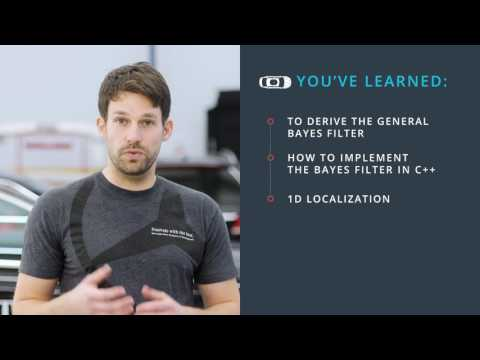

In [8]:
YouTubeVideo('3npZxfdrOpY', width=960, height=540)